In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### A.Define the problem and perform Exploratory Data Analysis

#### 1.Read the data as an appropriate time series data

In [2]:
rose_data = pd.read_csv("Rose.csv")
rose_data.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [3]:
sparkling_data = pd.read_csv("Sparkling.csv")
sparkling_data.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

#### 2.Plot the data

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Sparkling Wine Time Series')

([<matplotlib.axis.XTick at 0x15118925b10>,
 [Text(0.0, 0, '1980-01'),
  Text(6.0, 0, '1980-07'),
  Text(12.0, 0, '1981-01'),
  Text(18.0, 0, '1981-07'),
  Text(24.0, 0, '1982-01'),
  Text(30.0, 0, '1982-07'),
  Text(36.0, 0, '1983-01'),
  Text(42.0, 0, '1983-07'),
  Text(48.0, 0, '1984-01'),
  Text(54.0, 0, '1984-07'),
  Text(60.0, 0, '1985-01'),
  Text(66.0, 0, '1985-07'),
  Text(72.0, 0, '1986-01'),
  Text(78.0, 0, '1986-07'),
  Text(84.0, 0, '1987-01'),
  Text(90.0, 0, '1987-07'),
  Text(96.0, 0, '1988-01'),
  Text(102.0, 0, '1988-07'),
  Text(108.0, 0, '1989-01'),
  Text(114.0, 0, '1989-07'),
  Text(120.0, 0, '1990-01'),
  Text(126.0, 0, '1990-07'),
  Text(132.0, 0, '1991-01'),
  Text(138.0, 0, '1991-07'),
  Text(144.0, 0, '1992-01'),
  Text(150.0, 0, '1992-07'),
  Text(156.0, 0, '1993-01'),
  Text(162.0, 0, '1993-07'),
  Text(168.0, 0, '1994-01'),
  Text(174.0, 0, '1994-07'),
  Text(180.0, 0, '1995-01'),
  Text(186.0, 0, '1995-07')])

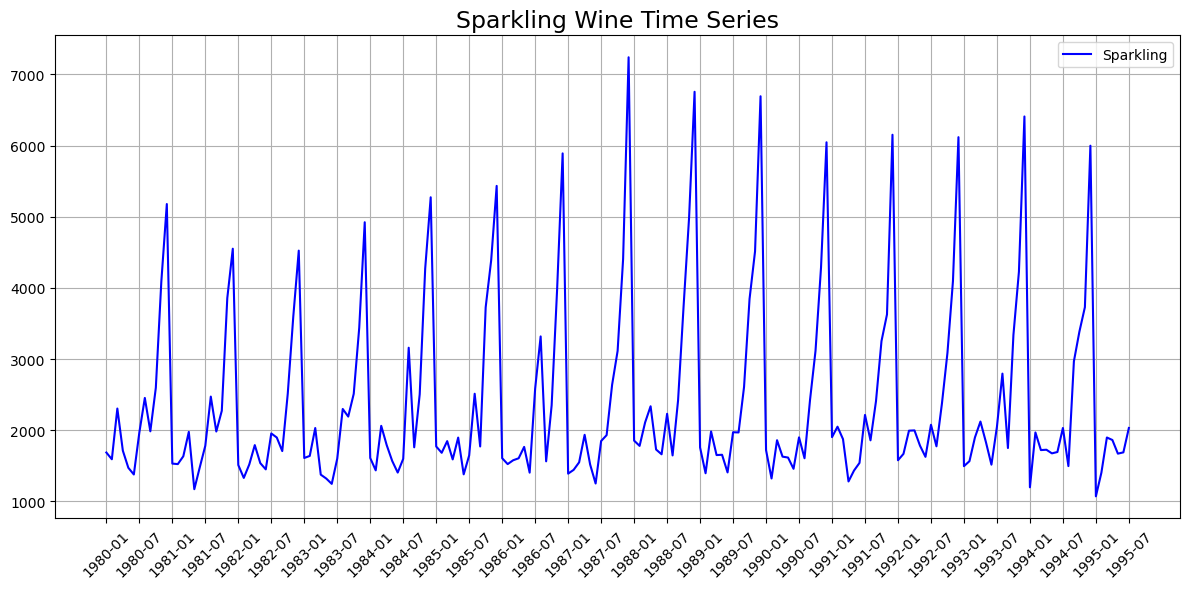

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Rose Wine Time Series')

([<matplotlib.axis.XTick at 0x15119a80810>,
 [Text(0.0, 0, '1980-01'),
  Text(6.0, 0, '1980-07'),
  Text(12.0, 0, '1981-01'),
  Text(18.0, 0, '1981-07'),
  Text(24.0, 0, '1982-01'),
  Text(30.0, 0, '1982-07'),
  Text(36.0, 0, '1983-01'),
  Text(42.0, 0, '1983-07'),
  Text(48.0, 0, '1984-01'),
  Text(54.0, 0, '1984-07'),
  Text(60.0, 0, '1985-01'),
  Text(66.0, 0, '1985-07'),
  Text(72.0, 0, '1986-01'),
  Text(78.0, 0, '1986-07'),
  Text(84.0, 0, '1987-01'),
  Text(90.0, 0, '1987-07'),
  Text(96.0, 0, '1988-01'),
  Text(102.0, 0, '1988-07'),
  Text(108.0, 0, '1989-01'),
  Text(114.0, 0, '1989-07'),
  Text(120.0, 0, '1990-01'),
  Text(126.0, 0, '1990-07'),
  Text(132.0, 0, '1991-01'),
  Text(138.0, 0, '1991-07'),
  Text(144.0, 0, '1992-01'),
  Text(150.0, 0, '1992-07'),
  Text(156.0, 0, '1993-01'),
  Text(162.0, 0, '1993-07'),
  Text(168.0, 0, '1994-01'),
  Text(174.0, 0, '1994-07'),
  Text(180.0, 0, '1995-01'),
  Text(186.0, 0, '1995-07')])

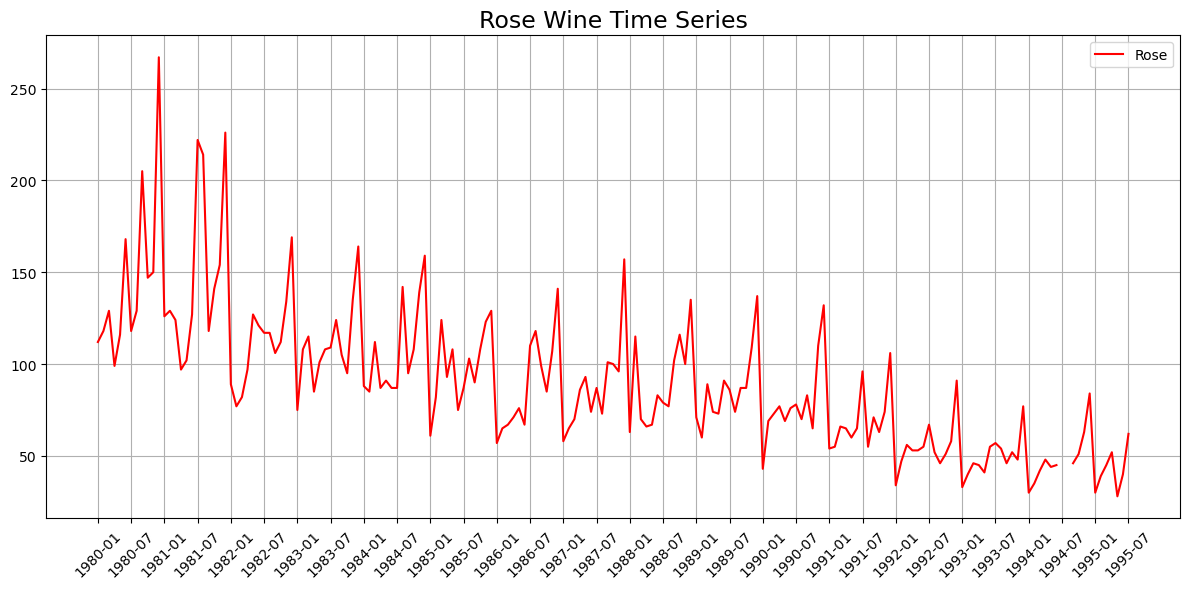

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
rose_data = pd.read_csv("Rose.csv")
sparkling_data = pd.read_csv("Sparkling.csv")

# Plotting Sparkling time series
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(sparkling_data['YearMonth'], sparkling_data['Sparkling'], color='blue')
plt.title('Sparkling Wine Time Series', fontsize=17)
plt.xticks(sparkling_data['YearMonth'][::6], rotation=45)  # Show every 6th label and rotate by 45 degrees
plt.grid()
plt.legend(['Sparkling'])
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight')
plt.show()

# Plotting Rose time series
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(rose_data['YearMonth'], rose_data['Rose'], color='red')
plt.title('Rose Wine Time Series', fontsize=17)
plt.xticks(rose_data['YearMonth'][::6], rotation=45)  # Show every 6th label and rotate by 45 degrees
plt.grid()
plt.legend(['Rose'], loc='best')
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight')
plt.show()


#### 3.Perform EDA

In [5]:
# Summary statistics for Rose dataset
rose_summary = rose_data.describe()
print("Summary statistics for Rose dataset:\n", rose_summary)

# Summary statistics for Sparkling dataset
sparkling_summary = sparkling_data.describe()
print("\nSummary statistics for Sparkling dataset:\n", sparkling_summary)


Summary statistics for Rose dataset:
              Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

Summary statistics for Sparkling dataset:
          Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


In [7]:
# Convert YearMonth to datetime format for proper alignment
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'])
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'])

# Set YearMonth as the index for both datasets for alignment
rose_data.set_index('YearMonth', inplace=True)
sparkling_data.set_index('YearMonth', inplace=True)

# Correlation analysis between Rose and Sparkling sales
correlation = rose_data['Rose'].corr(sparkling_data['Sparkling'])
print("Correlation between Rose and Sparkling sales:", correlation)


Correlation between Rose and Sparkling sales: 0.40457904770543324


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='Rose'>

Text(0.5, 1.0, 'Monthly Boxplot of Rose Sales')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Sales')

([<matplotlib.axis.XTick at 0x1513b0fa3d0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

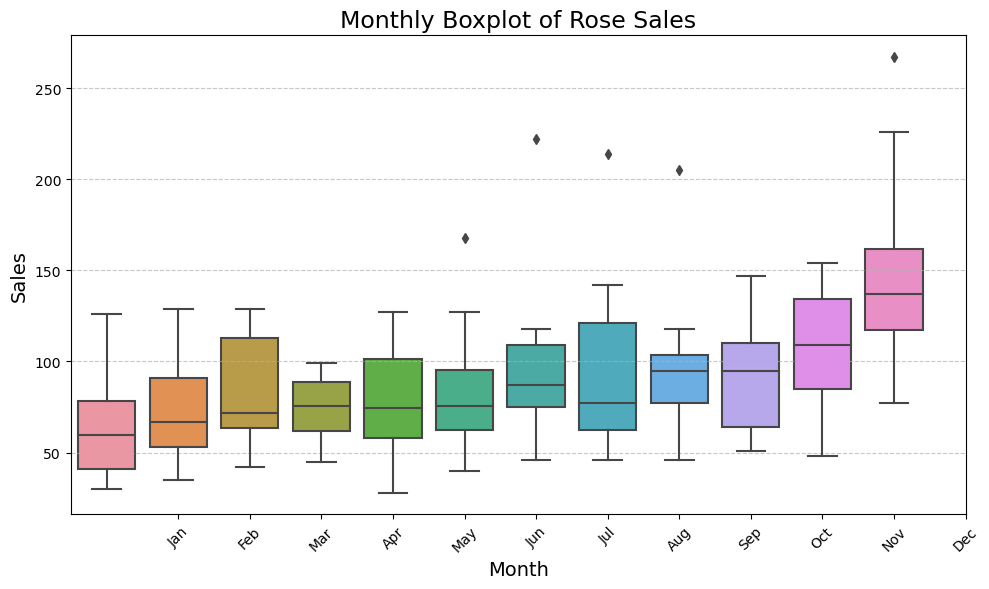

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month', ylabel='Sparkling'>

Text(0.5, 1.0, 'Monthly Boxplot of Sparkling Sales')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Sales')

([<matplotlib.axis.XTick at 0x151227d4ed0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

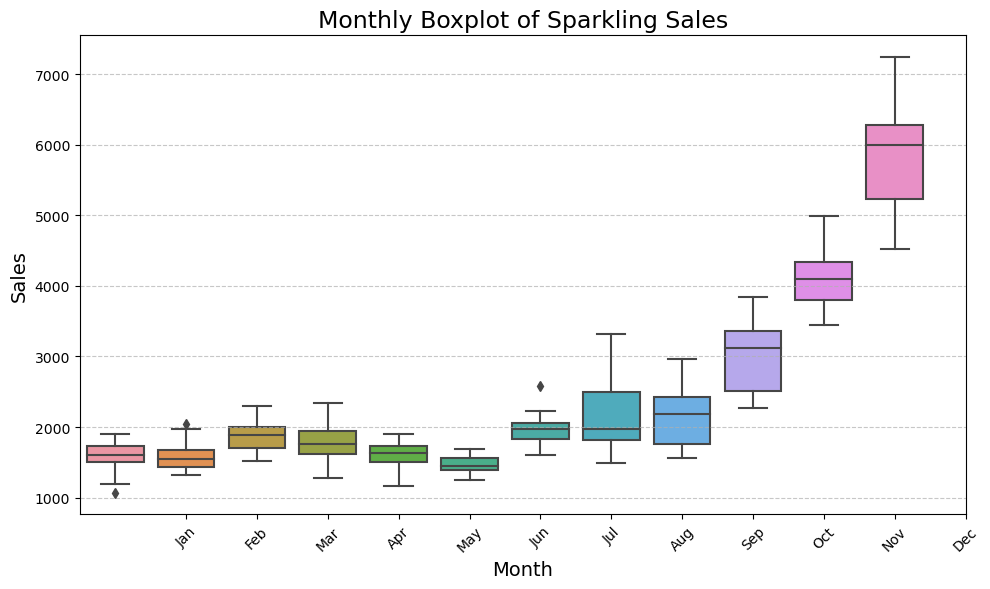

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the index to datetime format
rose_data.index = pd.to_datetime(rose_data.index)

# Extract month from the index
rose_data['Month'] = rose_data.index.month

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Rose', data=rose_data)
plt.title('Monthly Boxplot of Rose Sales', fontsize=17)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rose_monthly_boxplot.jpg')
plt.show()







# Convert the index to datetime format
sparkling_data.index = pd.to_datetime(sparkling_data.index)

# Extract month from the index
sparkling_data['Month'] = rose_data.index.month

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sparkling', data=sparkling_data)
plt.title('Monthly Boxplot of Sparkling Sales', fontsize=17)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('sparkling_monthly_boxplot.jpg')
plt.show()

### B.Data Pre-processing

#### 1.Missing value treatment

In [8]:
# Check for missing values in Rose dataset after filling
rose_missing_values_after_fill = rose_data.isnull().sum()
print("Missing values in Rose dataset after filling:\n", rose_missing_values_after_fill)

# Check for missing values in Sparkling dataset
sparkling_missing_values = sparkling_data.isnull().sum()
print("\nMissing values in Sparkling dataset:\n", sparkling_missing_values)


Missing values in Rose dataset after filling:
 Rose    2
dtype: int64

Missing values in Sparkling dataset:
 Sparkling    0
dtype: int64


In [9]:
# Fill missing values in Rose dataset using backward filling
rose_data['Rose'].fillna(method='bfill', inplace=True)

# Check for missing values in Rose dataset after backward filling
rose_missing_values_after_fill = rose_data.isnull().sum()
print("Missing values in Rose dataset after backward filling:\n", rose_missing_values_after_fill)


Missing values in Rose dataset after backward filling:
 Rose    0
dtype: int64


In [10]:
# Check for missing values in Rose dataset
rose_missing_values_final = rose_data.isnull().sum()
print("Missing values in Rose dataset:\n", rose_missing_values_final)

# Check for missing values in Sparkling dataset
sparkling_missing_values_final = sparkling_data.isnull().sum()
print("\nMissing values in Sparkling dataset:\n", sparkling_missing_values_final)


Missing values in Rose dataset:
 Rose    0
dtype: int64

Missing values in Sparkling dataset:
 Sparkling    0
dtype: int64


#### (A._4.Perform Decomposition)

<Figure size 1000x600 with 0 Axes>

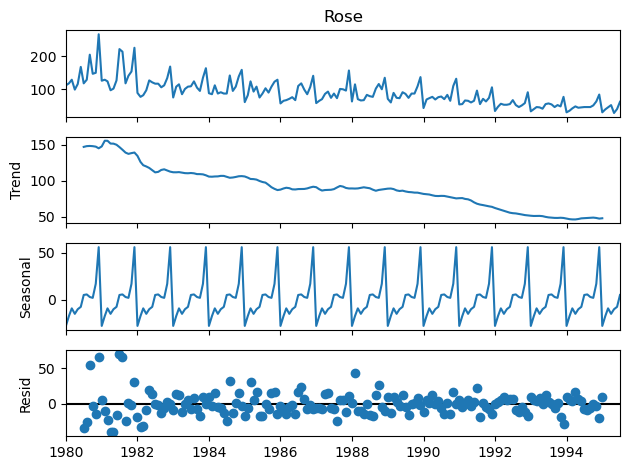

Text(0.5, 1.02, 'Seasonal Decomposition of Rose Sales')

<Figure size 1000x600 with 0 Axes>

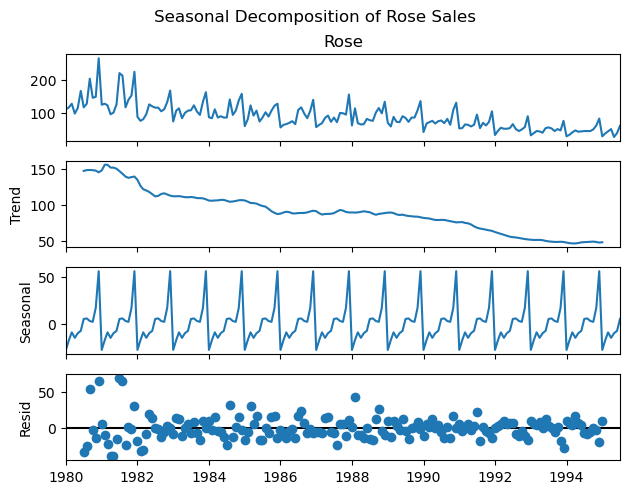

<Figure size 1000x600 with 0 Axes>

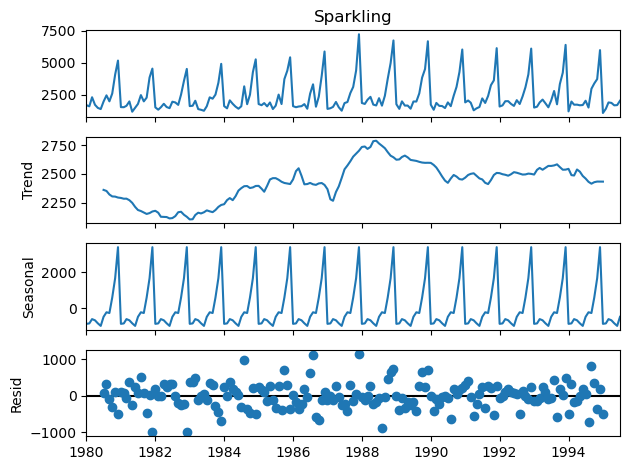

Text(0.5, 1.02, 'Seasonal Decomposition of Sparkling Sales')

<Figure size 1000x600 with 0 Axes>

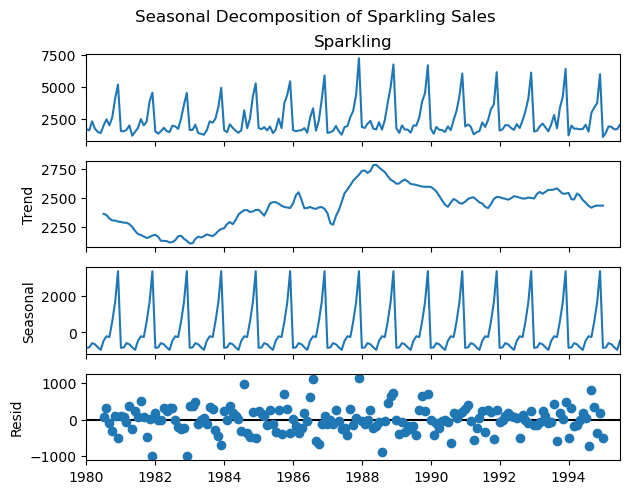

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for Rose sales
rose_decomposition = seasonal_decompose(rose_data['Rose'], model='additive', period=12)

# Plot seasonal decomposition for Rose sales
plt.figure(figsize=(10, 6))
rose_decomposition.plot()
plt.suptitle('Seasonal Decomposition of Rose Sales', y=1.02)
plt.show()

# Perform seasonal decomposition for Sparkling sales
sparkling_decomposition = seasonal_decompose(sparkling_data['Sparkling'], model='additive', period=12)

# Plot seasonal decomposition for Sparkling sales
plt.figure(figsize=(10, 6))
sparkling_decomposition.plot()
plt.suptitle('Seasonal Decomposition of Sparkling Sales', y=1.02)
plt.show()


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for Rose dataset
decomposition_rose = seasonal_decompose(rose_data['Rose'], model='additive', period=12)

# Extract trend, seasonality, and residual components
trend_rose = decomposition_rose.trend
seasonality_rose = decomposition_rose.seasonal
residual_rose = decomposition_rose.resid

# Print and save trend, seasonality, and residual components for Rose dataset
print('Trend', '\n', trend_rose.head(12), '\n')
print('Seasonality', '\n', seasonality_rose.head(12), '\n')
print('Residual', '\n', residual_rose.head(12), '\n')

trend_rose.head(12).to_csv('rose_trend_m.csv')
seasonality_rose.head(12).to_csv('rose_season_m.csv')
residual_rose.head(12).to_csv('rose_resid_m.csv')


Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.914120
1980-02-01   -17.440509
1980-03-01    -9.291700
1980-04-01   -15.104200
1980-05-01   -10.202414
1980-06-01    -7.684557
1980-07-01     4.935880
1980-08-01     5.516435
1980-09-01     2.769213
1980-10-01     1.866435
1980-11-01    16.841435
1980-12-01    55.708102
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.019213
1980-08-01   -24.641435
1980-09-01    53.855787
1980-10-01    -2.949769
1980-11-01   -14.258102
1980-12-01    66.16689

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Residual Component of Rose Wine Sales')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Residual')

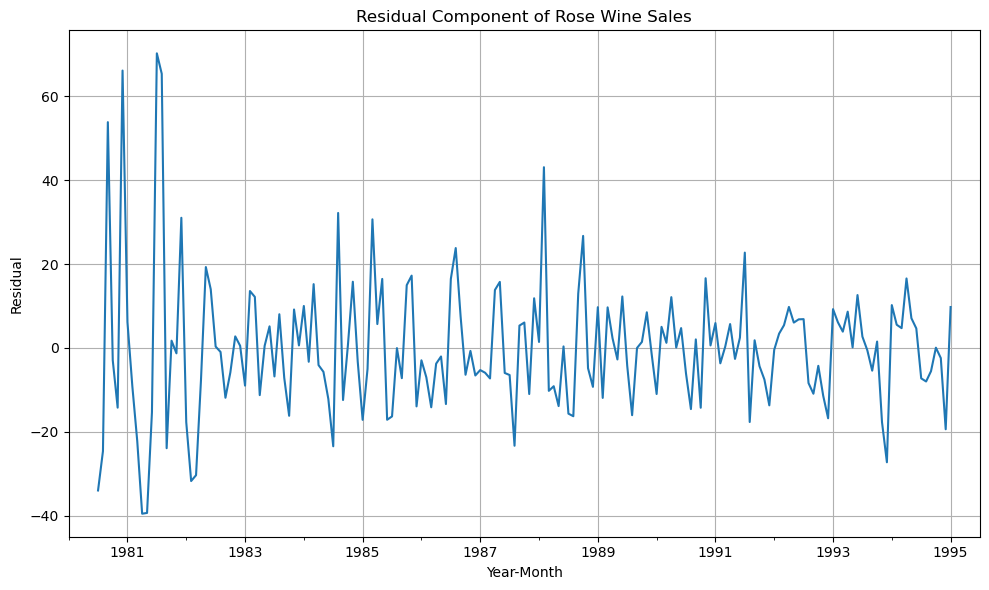

In [13]:
import matplotlib.pyplot as plt

# Plot the residual component
plt.figure(figsize=(10, 6))
residual_rose.plot()
plt.title('Residual Component of Rose Wine Sales')
plt.xlabel('Year-Month')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Perform seasonal decomposition for Sparkling dataset
decomposition_sparkling = seasonal_decompose(sparkling_data['Sparkling'], model='additive', period=12)

# Extract trend, seasonality, and residual components for Sparkling dataset
trend_sparkling = decomposition_sparkling.trend
seasonality_sparkling = decomposition_sparkling.seasonal
residual_sparkling = decomposition_sparkling.resid

# Print and save trend, seasonality, and residual components for Sparkling dataset
print('Trend', '\n', trend_sparkling.head(12), '\n')
print('Seasonality', '\n', seasonality_sparkling.head(12), '\n')
print('Residual', '\n', residual_sparkling.head(12), '\n')

trend_sparkling.head(12).to_csv('spark_trend_m.csv')
seasonality_sparkling.head(12).to_csv('spark_season_m.csv')
residual_sparkling.head(12).to_csv('spark_resid_m.csv')


Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [15]:
# Calculate coefficient of variation for the residual component
cvsm = residual_sparkling.std() / residual_sparkling.mean()
print("Coefficient of Variation for the Residual Component:", cvsm)


Coefficient of Variation for the Residual Component: -296.08335294144075


#### 2.Visualize the processed data

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Rose Wine Sales Over Time')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

(array([2922., 3652., 4383., 5113., 5844., 6574., 7305., 8035., 8766.,
        9496.]),
 [Text(2922.0, 0, '1978'),
  Text(3652.0, 0, '1980'),
  Text(4383.0, 0, '1982'),
  Text(5113.0, 0, '1984'),
  Text(5844.0, 0, '1986'),
  Text(6574.0, 0, '1988'),
  Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996')])

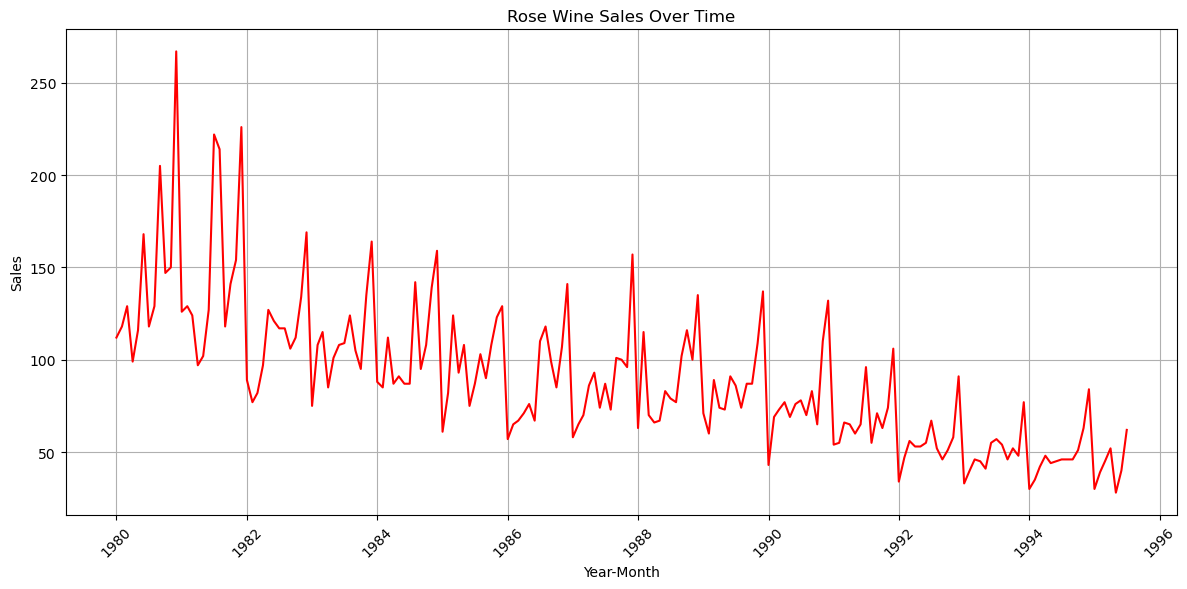

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Sparkling Wine Sales Over Time')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

(array([2922., 3652., 4383., 5113., 5844., 6574., 7305., 8035., 8766.,
        9496.]),
 [Text(2922.0, 0, '1978'),
  Text(3652.0, 0, '1980'),
  Text(4383.0, 0, '1982'),
  Text(5113.0, 0, '1984'),
  Text(5844.0, 0, '1986'),
  Text(6574.0, 0, '1988'),
  Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996')])

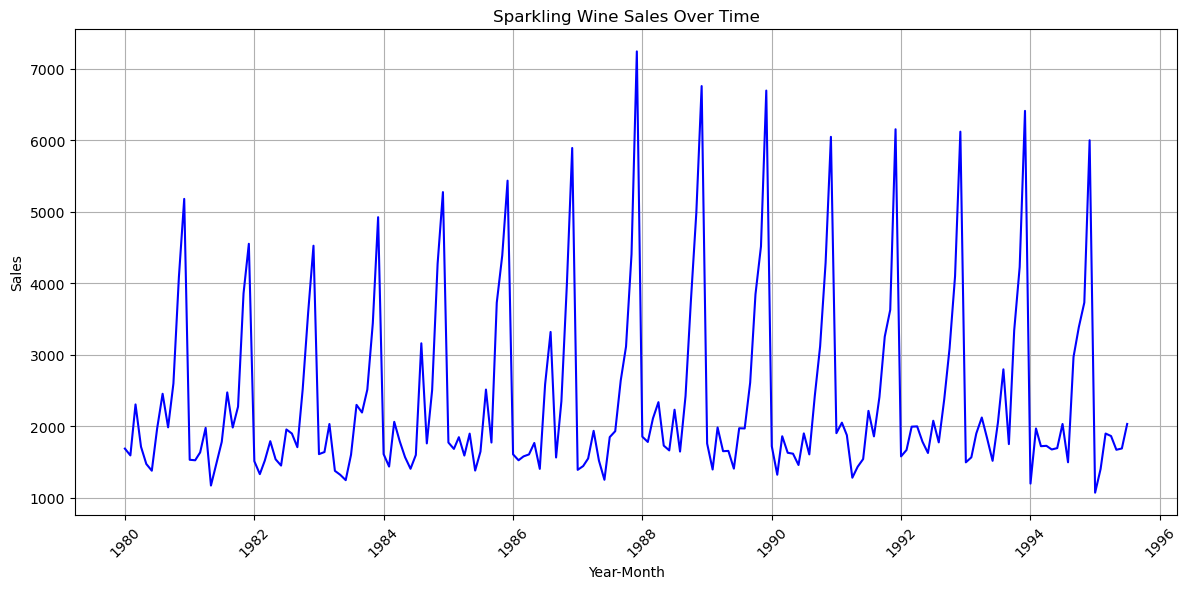

In [16]:
# Plotting Rose dataset
plt.figure(figsize=(12, 6))
plt.plot(rose_data.index, rose_data['Rose'], color='red')
plt.title('Rose Wine Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Sparkling dataset
plt.figure(figsize=(12, 6))
plt.plot(sparkling_data.index, sparkling_data['Sparkling'], color='blue')
plt.title('Sparkling Wine Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.Train-test split

In [17]:
from sklearn.model_selection import train_test_split

# Reset index to have 'YearMonth' as a column
rose_data.reset_index(inplace=True)
sparkling_data.reset_index(inplace=True)

# Train-test split for Rose dataset
rose_train, rose_test = train_test_split(rose_data, test_size=0.2, shuffle=False)

# Train-test split for Sparkling dataset
sparkling_train, sparkling_test = train_test_split(sparkling_data, test_size=0.2, shuffle=False)

# Display shapes of train and test sets
print("Rose Train shape:", rose_train.shape)
print("Rose Test shape:", rose_test.shape)
print("Sparkling Train shape:", sparkling_train.shape)
print("Sparkling Test shape:", sparkling_test.shape)


Rose Train shape: (149, 2)
Rose Test shape: (38, 2)
Sparkling Train shape: (149, 2)
Sparkling Test shape: (38, 2)


In [18]:
# Printing and saving Rose training and testing sets
print('First few rows of Rose Training Data')
display(rose_train.head())
print('Last few rows of Rose Training Data')
display(rose_train.tail())
print('First few rows of Rose Test Data')
display(rose_test.head())
print('Last few rows of Rose Test Data')
display(rose_test.tail())

rose_train.to_csv('rose_train.csv', index=False)
rose_test.to_csv('rose_test.csv', index=False)


# Printing and saving Sparkling training and testing sets
print('First few rows of Sparkling Training Data')
display(sparkling_train.head())
print('Last few rows of Sparkling Training Data')
display(sparkling_train.tail())
print('First few rows of Sparkling Test Data')
display(sparkling_test.head())
print('Last few rows of Sparkling Test Data')
display(sparkling_test.tail())

sparkling_train.to_csv('sparkling_train.csv', index=False)
sparkling_test.to_csv('sparkling_test.csv', index=False)


First few rows of Rose Training Data


YearMonth   Rose
0 1980-01-01  112.0
1 1980-02-01  118.0
2 1980-03-01  129.0
3 1980-04-01   99.0
4 1980-05-01  116.0

Last few rows of Rose Training Data


YearMonth  Rose
144 1992-01-01  34.0
145 1992-02-01  47.0
146 1992-03-01  56.0
147 1992-04-01  53.0
148 1992-05-01  53.0

First few rows of Rose Test Data


YearMonth  Rose
149 1992-06-01  55.0
150 1992-07-01  67.0
151 1992-08-01  52.0
152 1992-09-01  46.0
153 1992-10-01  51.0

Last few rows of Rose Test Data


YearMonth  Rose
182 1995-03-01  45.0
183 1995-04-01  52.0
184 1995-05-01  28.0
185 1995-06-01  40.0
186 1995-07-01  62.0

First few rows of Sparkling Training Data


YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

Last few rows of Sparkling Training Data


YearMonth  Sparkling
144 1992-01-01       1577
145 1992-02-01       1667
146 1992-03-01       1993
147 1992-04-01       1997
148 1992-05-01       1783

First few rows of Sparkling Test Data


YearMonth  Sparkling
149 1992-06-01       1625
150 1992-07-01       2076
151 1992-08-01       1773
152 1992-09-01       2377
153 1992-10-01       3088

Last few rows of Sparkling Test Data


YearMonth  Sparkling
182 1995-03-01       1897
183 1995-04-01       1862
184 1995-05-01       1670
185 1995-06-01       1688
186 1995-07-01       2031

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='YearMonth'>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Rose Data Train and Test Split')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

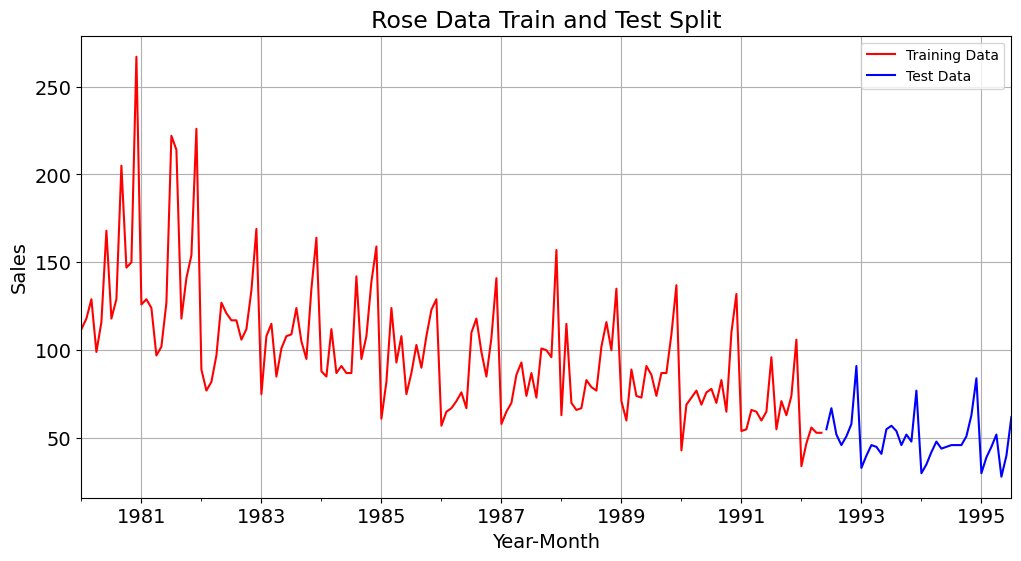

In [19]:
# Splitting the data into training and testing sets
# Assuming 'YearMonth' column contains datetime information
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'])
rose_data.set_index('YearMonth', inplace=True)

train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(rose_data) * train_ratio)
rtrain = rose_data.iloc[:split_index]
rtest = rose_data.iloc[split_index:]

# Plotting Rose data train and test split
plt.figure(figsize=(12, 6))
rtrain['Rose'].plot(fontsize=14, color='red')
rtest['Rose'].plot(fontsize=14, color='blue')
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='YearMonth'>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

(array([132, 156, 180, 204, 228, 252, 276, 300]),
 [Text(132, 0, '1981'),
  Text(156, 0, '1983'),
  Text(180, 0, '1985'),
  Text(204, 0, '1987'),
  Text(228, 0, '1989'),
  Text(252, 0, '1991'),
  Text(276, 0, '1993'),
  Text(300, 0, '1995')])

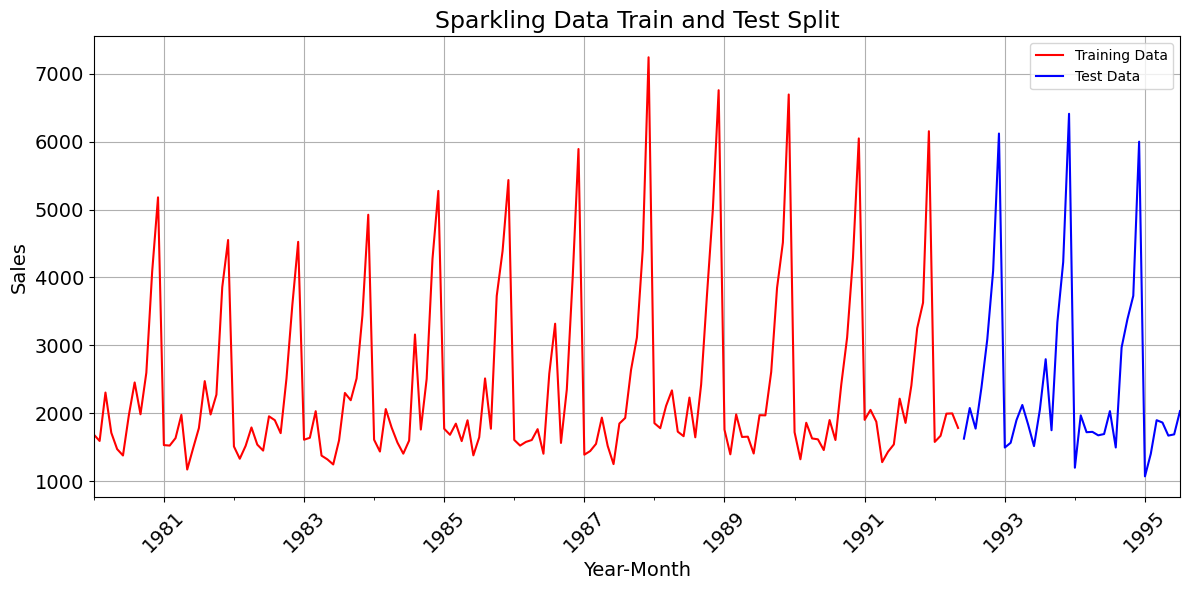

In [20]:
# Splitting the data into training and testing sets
# Assuming 'YearMonth' column contains datetime information
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'])
sparkling_data.set_index('YearMonth', inplace=True)

train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(sparkling_data) * train_ratio)
strain = sparkling_data.iloc[:split_index]
stest = sparkling_data.iloc[split_index:]

# Plotting Sparkling data train and test split
plt.figure(figsize=(12, 6))
strain['Sparkling'].plot(fontsize=14, color='red')
stest['Sparkling'].plot(fontsize=14, color='blue')
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()


### C.  Model Building - Original Data

### Model 1- Linear regression

##### Rose

In [21]:
rtrain.shape
rtest.shape

(149, 1)

(38, 1)

In [22]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [23]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [24]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth             
1992-01-01  34.0   145
1992-02-01  47.0   146
1992-03-01  56.0   147
1992-04-01  53.0   148
1992-05-01  53.0   149

First few rows of Test Data


Rose  time
YearMonth             
1992-06-01  55.0   133
1992-07-01  67.0   134
1992-08-01  52.0   135
1992-09-01  46.0   136
1992-10-01  51.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   166
1995-04-01  52.0   167
1995-05-01  28.0   168
1995-06-01  40.0   169
1995-07-01  62.0   170

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

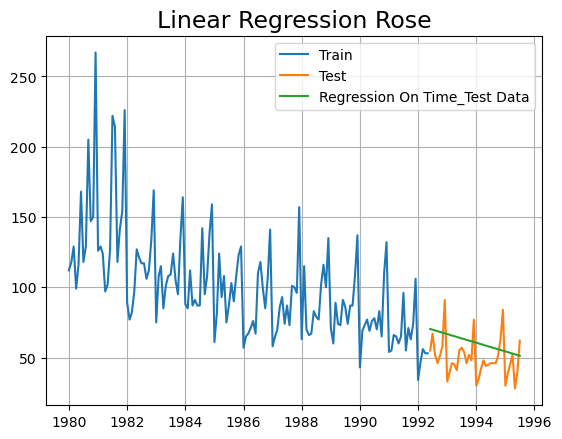

In [28]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

In [29]:
from sklearn import metrics

In [30]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.475 


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       17.475054

##### Sparkling

In [32]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [33]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [34]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1992-01-01       1577   145
1992-02-01       1667   146
1992-03-01       1993   147
1992-04-01       1997   148
1992-05-01       1783   149

First few rows of Test Data


Sparkling  time
YearMonth                  
1992-06-01       1625   133
1992-07-01       2076   134
1992-08-01       1773   135
1992-09-01       2377   136
1992-10-01       3088   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   166
1995-04-01       1862   167
1995-05-01       1670   168
1995-06-01       1688   169
1995-07-01       2031   170

In [35]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

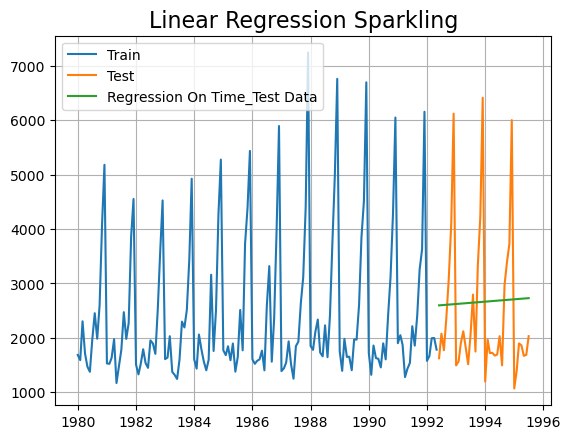

In [36]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

In [37]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1349.042 


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf


Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       17.475054          1349.042457

### Model 2- Simple Average

##### Sparkling & Rose

In [39]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()


Sparkling  mean_forecast
YearMonth                           
1992-06-01       1625    2388.610738
1992-07-01       2076    2388.610738
1992-08-01       1773    2388.610738
1992-09-01       2377    2388.610738
1992-10-01       3088    2388.610738

Rose  mean_forecast
YearMonth                      
1992-06-01  55.0     100.167785
1992-07-01  67.0     100.167785
1992-08-01  52.0     100.167785
1992-09-01  46.0     100.167785
1992-10-01  51.0     100.167785

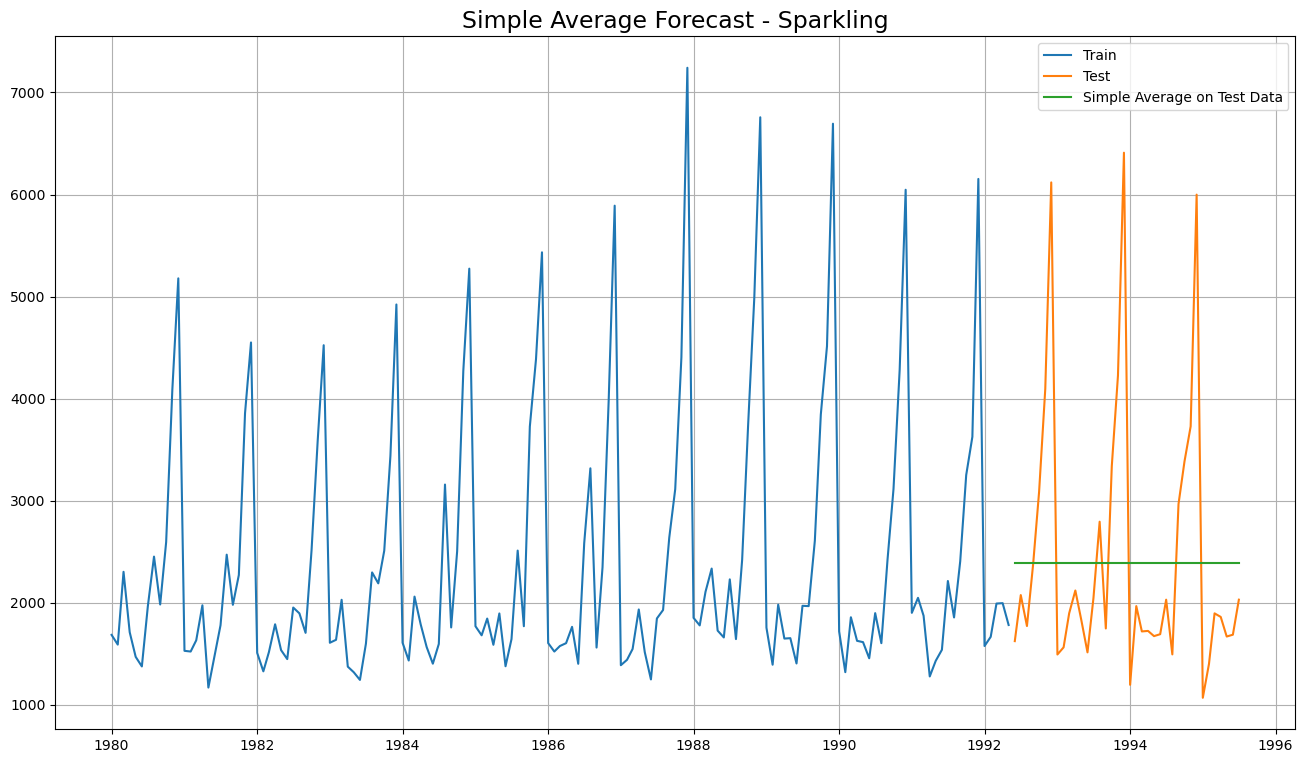

In [274]:

plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

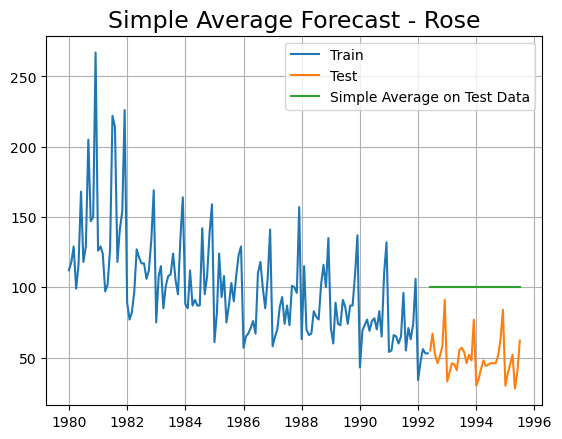

In [41]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

In [42]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))


rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 2705.475
For Simple Average forecast on Rose Test Data,  RMSE is 52.184


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32

resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31


Test RMSE Sparkling
SimpleAverageModel          2705.474937

Test RMSE Rose
SimpleAverageModel       52.184392

In [44]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel       52.184392          2705.474937

In [45]:
resultsDf5 = pd.concat([resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel       52.184392          2705.474937

### Model 3- Moving Average

#### Rose

In [46]:
MovingAverage = rose_data.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [47]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

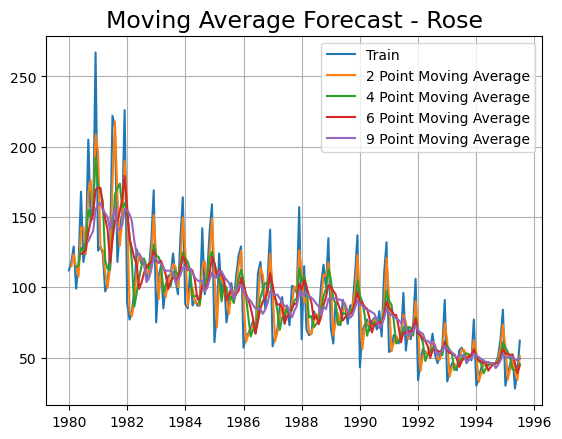

In [48]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

In [49]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

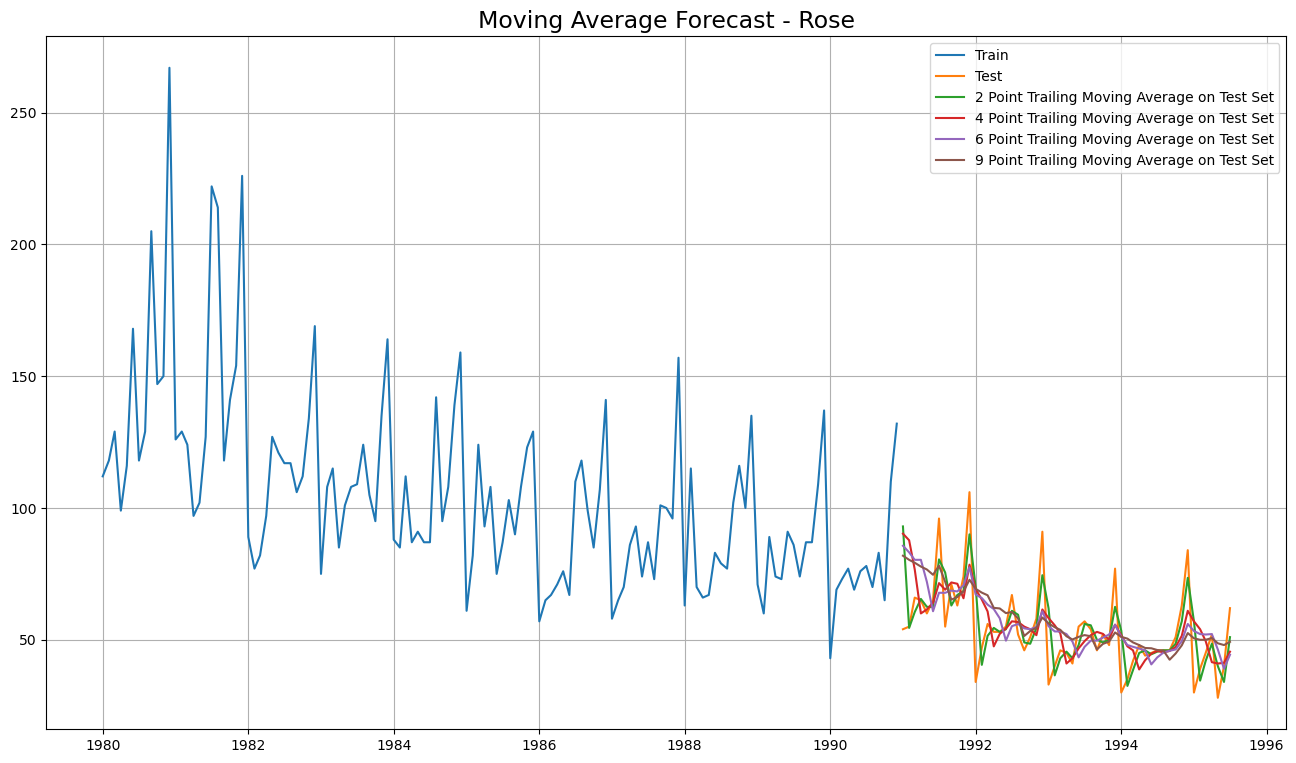

In [50]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for 2-point moving average
rmse_2 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_2']))
print("RMSE for 2-point Moving Average:", rmse_2)

# Calculate RMSE for 4-point moving average
rmse_4 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_4']))
print("RMSE for 4-point Moving Average:", rmse_4)

# Calculate RMSE for 6-point moving average
rmse_6 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_6']))
print("RMSE for 6-point Moving Average:", rmse_6)

# Calculate RMSE for 9-point moving average
rmse_9 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_9']))
print("RMSE for 9-point Moving Average:", rmse_9)


RMSE for 2-point Moving Average: 11.529409036341487
RMSE for 4-point Moving Average: 14.448930441700206
RMSE for 6-point Moving Average: 14.560046342472592
RMSE for 9-point Moving Average: 14.724503349100287


In [52]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_2,rmse_4,rmse_6,rmse_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529409
4pointTrailingMovingAverage       14.448930
6pointTrailingMovingAverage       14.560046
9pointTrailingMovingAverage       14.724503

#### Sparkling

In [53]:
MovingAverage = sparkling_data.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [54]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

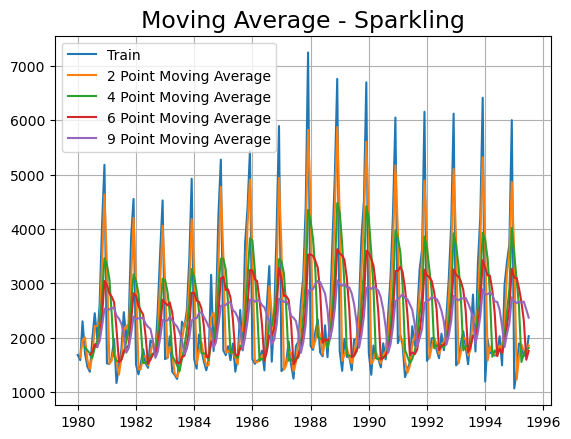

In [55]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

In [56]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

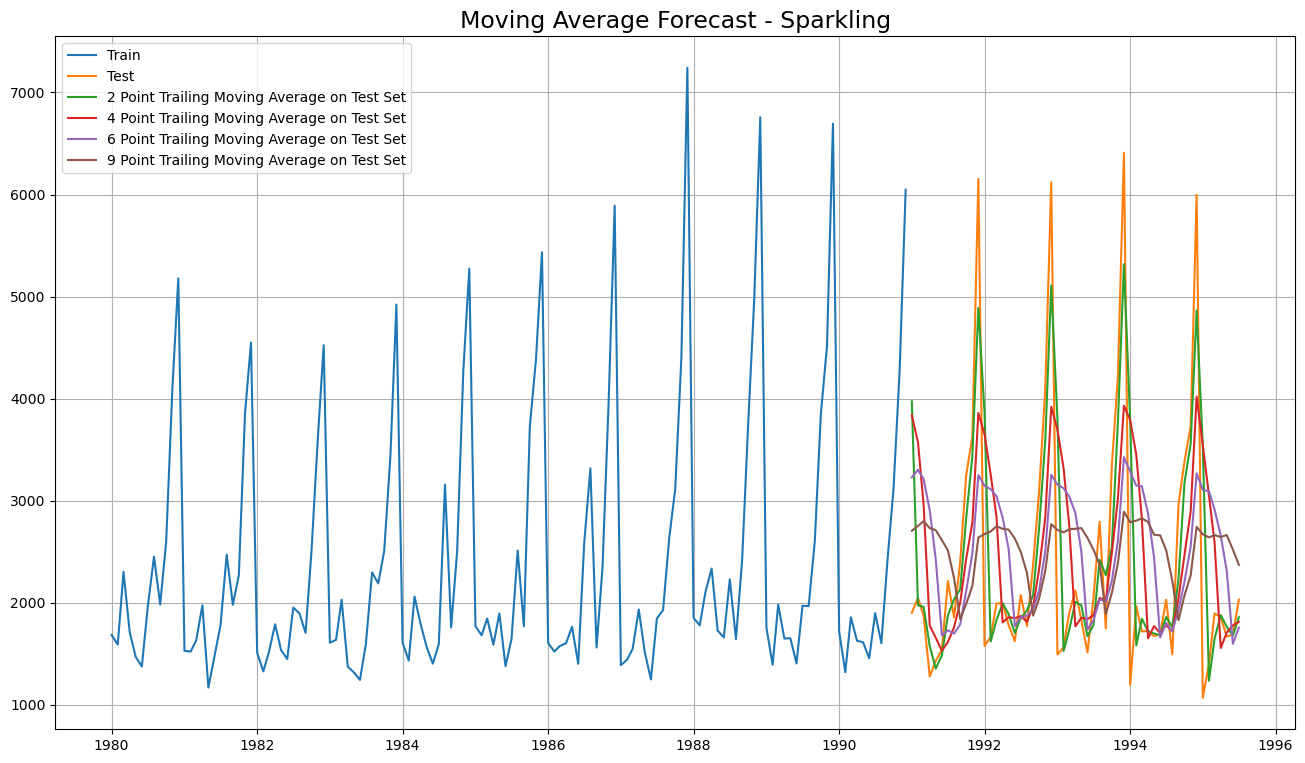

In [57]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for 2-point moving average
rmse_sparkling_2 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_2'].dropna()))
print("RMSE for 2-point Moving Average (Sparkling):", rmse_sparkling_2)

# Calculate RMSE for 4-point moving average
rmse_sparkling_4 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_4'].dropna()))
print("RMSE for 4-point Moving Average (Sparkling):", rmse_sparkling_4)

# Calculate RMSE for 6-point moving average
rmse_sparkling_6 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_6'].dropna()))
print("RMSE for 6-point Moving Average (Sparkling):", rmse_sparkling_6)

# Calculate RMSE for 9-point moving average
rmse_sparkling_9 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_9'].dropna()))
print("RMSE for 9-point Moving Average (Sparkling):", rmse_sparkling_9)


RMSE for 2-point Moving Average (Sparkling): 813.4006839972983
RMSE for 4-point Moving Average (Sparkling): 1156.589694081071
RMSE for 6-point Moving Average (Sparkling): 1283.9274280129855
RMSE for 9-point Moving Average (Sparkling): 1346.2783154241804


In [59]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_sparkling_2,rmse_sparkling_4,rmse_sparkling_6,rmse_sparkling_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [60]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529409           813.400684
4pointTrailingMovingAverage       14.448930          1156.589694
6pointTrailingMovingAverage       14.560046          1283.927428
9pointTrailingMovingAverage       14.724503          1346.278315

### Rose all model's plot

In [61]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = rose_data.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

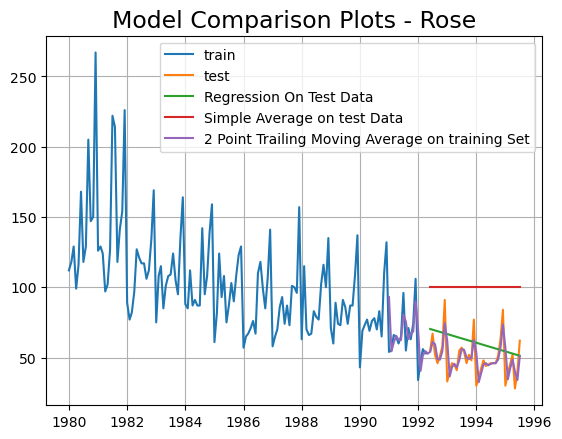

In [62]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

### Sparkling's all model's plot

In [63]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = sparkling_data.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

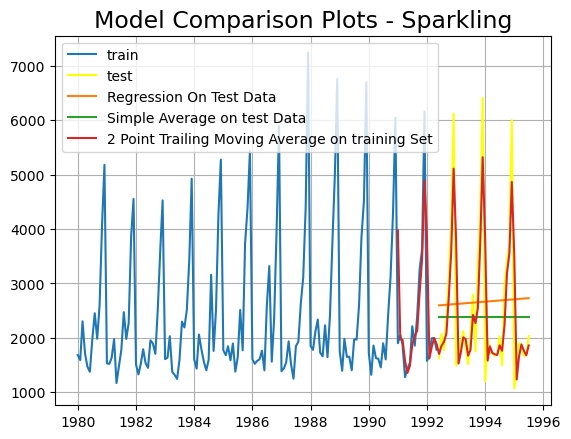

In [64]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

### Model 4- Exponential Models (Single, Double, Triple)

In [65]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

### SINGLE Exponential Smoothing with additive errors - ROSE

In [66]:
# create class
from statsmodels.tsa.api import SimpleExpSmoothing
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

In [68]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.10680671420827557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.10608754946995,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1992-06-01    64.924575
1992-07-01    64.924575
1992-08-01    64.924575
1992-09-01    64.924575
1992-10-01    64.924575
1992-11-01    64.924575
1992-12-01    64.924575
1993-01-01    64.924575
1993-02-01    64.924575
1993-03-01    64.924575
1993-04-01    64.924575
1993-05-01    64.924575
1993-06-01    64.924575
1993-07-01    64.924575
1993-08-01    64.924575
1993-09-01    64.924575
1993-10-01    64.924575
1993-11-01    64.924575
1993-12-01    64.924575
1994-01-01    64.924575
1994-02-01    64.924575
1994-03-01    64.924575
1994-04-01    64.924575
1994-05-01    64.924575
1994-06-01    64.924575
1994-07-01    64.924575
1994-08-01    64.924575
1994-09-01    64.924575
1994-10-01    64.924575
1994-11-01    64.924575
1994-12-01    64.924575
1995-01-01    64.924575
1995-02-01    64.924575
1995-03-01    64.924575
1995-04-01    64.924575
1995-05-01    64.924575
1995-06-01    64.924575
1995-07-01    64.924575
Freq: MS, dtype: float64

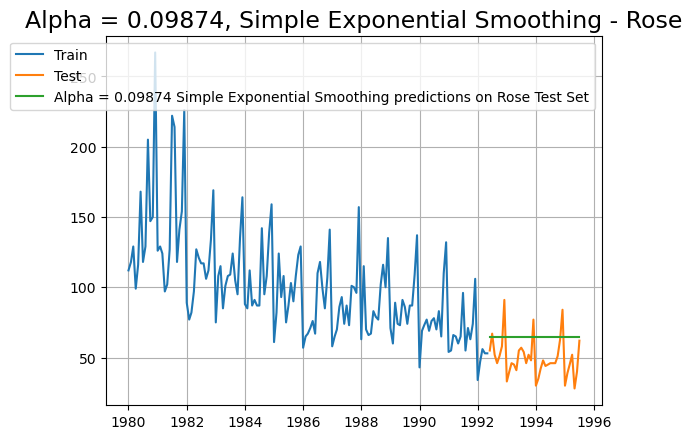

In [70]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [71]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

SES RMSE: 20.26321737728721
SES RMSE (calculated using statsmodels): 20.26321737728721


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Rose
Simple Exponential Smoothing       20.263217

### SINGLE Exponential Smoothing with additive errors - SPARKLING

In [72]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:

model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [74]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.06650931048354744,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1989.1334768533561,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1992-06-01    2472.852748
1992-07-01    2472.852748
1992-08-01    2472.852748
1992-09-01    2472.852748
1992-10-01    2472.852748
1992-11-01    2472.852748
1992-12-01    2472.852748
1993-01-01    2472.852748
1993-02-01    2472.852748
1993-03-01    2472.852748
1993-04-01    2472.852748
1993-05-01    2472.852748
1993-06-01    2472.852748
1993-07-01    2472.852748
1993-08-01    2472.852748
1993-09-01    2472.852748
1993-10-01    2472.852748
1993-11-01    2472.852748
1993-12-01    2472.852748
1994-01-01    2472.852748
1994-02-01    2472.852748
1994-03-01    2472.852748
1994-04-01    2472.852748
1994-05-01    2472.852748
1994-06-01    2472.852748
1994-07-01    2472.852748
1994-08-01    2472.852748
1994-09-01    2472.852748
1994-10-01    2472.852748
1994-11-01    2472.852748
1994-12-01    2472.852748
1995-01-01    2472.852748
1995-02-01    2472.852748
1995-03-01    2472.852748
1995-04-01    2472.852748
1995-05-01    2472.852748
1995-06-01    2472.852748
1995-07-01    2472.852748
Freq: MS, dt

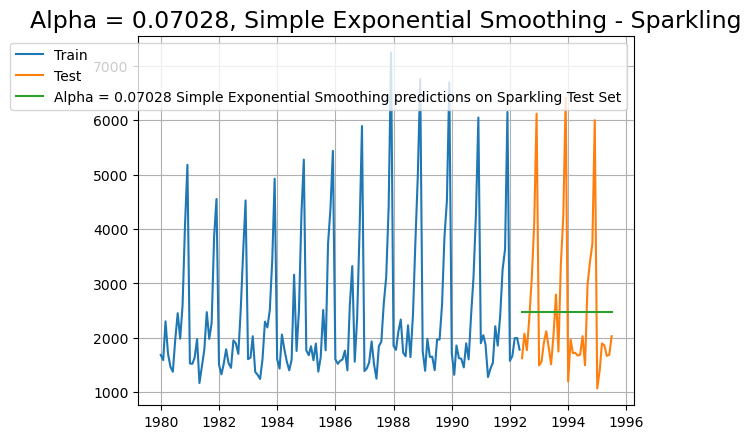

In [76]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [77]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [78]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])


resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

SES RMSE: 1329.402415796599
SES RMSE (calculated using statsmodels): 2423.153033436246


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Sparkling
Simple Exponential Smoothing          1329.402416

In [79]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       20.263217          1329.402416

In [80]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   17.475054          1349.042457
Simple Exponential Smoothing       20.263217          1329.402416

In [81]:
resultsDf = resultsDf8.copy()

### Double Exponential Smoothing with Addition Errors - Rose


* A limitation of simple exponential smoothing is its poor performance in handling trended data.
* An enhanced version of SES, called the Double Exponential model, addresses this issue by incorporating two smoothing parameters.
* It is suitable for datasets exhibiting trend but lacking seasonality.
* The model distinguishes between two main components: Level and Trend.
* The Level represents the local mean, while the Trend captures directional changes.
* The smoothing parameter α governs the Level series, while β controls the Trend series.

In [82]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 5.1567307628410446e-05, 'smoothing_trend': 1.3883864227032682e-07, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138.7898101253978, 'initial_trend': -0.5148818581341257, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose



1992-06-01    61.557487
1992-07-01    61.042605
1992-08-01    60.527723
1992-09-01    60.012841
1992-10-01    59.497959
1992-11-01    58.983077
1992-12-01    58.468195
1993-01-01    57.953314
1993-02-01    57.438432
1993-03-01    56.923550
1993-04-01    56.408668
1993-05-01    55.893786
1993-06-01    55.378904
1993-07-01    54.864022
1993-08-01    54.349141
1993-09-01    53.834259
1993-10-01    53.319377
1993-11-01    52.804495
1993-12-01    52.289613
1994-01-01    51.774731
1994-02-01    51.259849
1994-03-01    50.744968
1994-04-01    50.230086
1994-05-01    49.715204
1994-06-01    49.200322
1994-07-01    48.685440
1994-08-01    48.170558
1994-09-01    47.655676
1994-10-01    47.140795
1994-11-01    46.625913
1994-12-01    46.111031
1995-01-01    45.596149
1995-02-01    45.081267
1995-03-01    44.566385
1995-04-01    44.051503
1995-05-01    43.536622
1995-06-01    43.021740
1995-07-01    42.506858
Freq: MS, dtype: float64

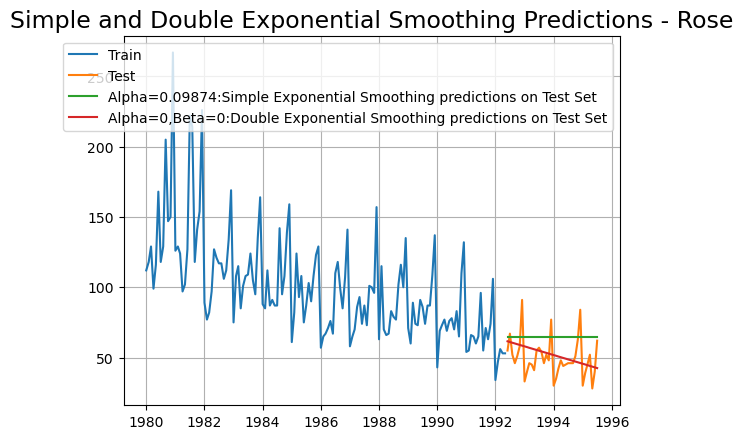

In [84]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

In [85]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 13.723187546897526


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Rose
Double Exponential Smoothing       13.723188

### Double Exponential Smoothing with Addition Errors - Sparkling

In [87]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.0761020337721272, 'smoothing_trend': 0.06918656939680358, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.420166766588, 'initial_trend': 2.272146159407498, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [88]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1992-06-01    2410.519157
1992-07-01    2401.963891
1992-08-01    2393.408624
1992-09-01    2384.853358
1992-10-01    2376.298091
1992-11-01    2367.742825
1992-12-01    2359.187558
1993-01-01    2350.632292
1993-02-01    2342.077025
1993-03-01    2333.521759
1993-04-01    2324.966492
1993-05-01    2316.411226
1993-06-01    2307.855959
1993-07-01    2299.300693
1993-08-01    2290.745426
1993-09-01    2282.190160
1993-10-01    2273.634893
1993-11-01    2265.079627
1993-12-01    2256.524360
1994-01-01    2247.969094
1994-02-01    2239.413827
1994-03-01    2230.858560
1994-04-01    2222.303294
1994-05-01    2213.748027
1994-06-01    2205.192761
1994-07-01    2196.637494
1994-08-01    2188.082228
1994-09-01    2179.526961
1994-10-01    2170.971695
1994-11-01    2162.416428
1994-12-01    2153.861162
1995-01-01    2145.305895
1995-02-01    2136.750629
1995-03-01    2128.195362
1995-04-01    2119.640096
1995-05-01    2111.084829
1995-06-01    2102.529563
1995-07-01    2093.974296
Freq: MS, dt

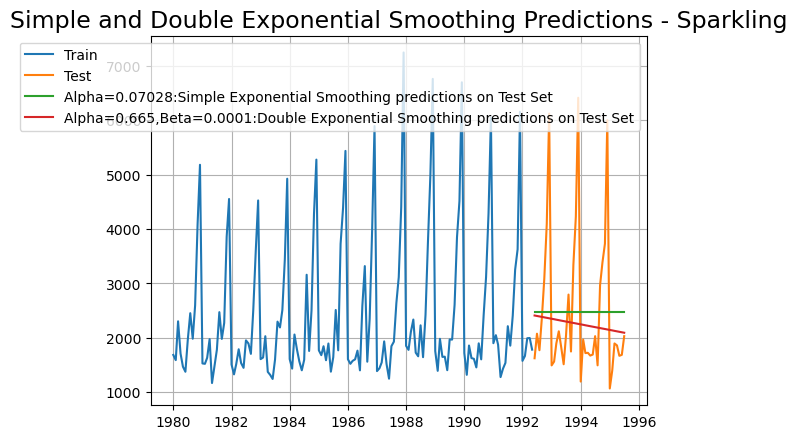

In [89]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [90]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 1340.4527732699116


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Sparkling
Double Exponential Smoothing          1340.452773

In [92]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       13.723188          1340.452773

In [93]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   17.475054          1349.042457
Simple Exponential Smoothing       20.263217          1329.402416
Double Exponential Smoothing       13.723188          1340.452773

In [94]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   17.475054          1349.042457
Simple Exponential Smoothing       20.263217          1329.402416
Double Exponential Smoothing       13.723188          1340.452773

### Inference
In this observation, it's evident that Double Exponential Smoothing outperforms Simple Exponential Smoothing. This superiority stems from Double Exponential Smoothing's capability to capture the trend component effectively.

### Triple Exponential Smoothing with Addition Errors - Rose

In [95]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08859521904316138, 'smoothing_trend': 4.84245798530699e-05, 'smoothing_seasonal': 4.397578065868075e-05, 'damping_trend': nan, 'initial_level': 147.31949389543658, 'initial_trend': -0.5615813198225483, 'initial_seasons': array([-30.43507971, -18.81415028, -10.27197354, -19.51666644,
       -12.02708371,  -6.77665241,   4.6156104 ,   6.92503459,
         4.96971218,   2.42111545,  19.62537821,  61.35512478]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [96]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1992-06-01     55.986221
1992-07-01     66.817077
1992-08-01     68.564856
1992-09-01     66.047771
1992-10-01     62.937694
1992-11-01     79.580553
1992-12-01    120.748557
1993-01-01     28.396797
1993-02-01     39.456138
1993-03-01     47.436637
1993-04-01     37.630373
1993-05-01     44.558099
1993-06-01     49.247079
1993-07-01     60.077934
1993-08-01     61.825714
1993-09-01     59.308628
1993-10-01     56.198552
1993-11-01     72.841411
1993-12-01    114.009415
1994-01-01     21.657655
1994-02-01     32.716995
1994-03-01     40.697495
1994-04-01     30.891231
1994-05-01     37.818957
1994-06-01     42.507936
1994-07-01     53.338792
1994-08-01     55.086571
1994-09-01     52.569486
1994-10-01     49.459410
1994-11-01     66.102269
1994-12-01    107.270272
1995-01-01     14.918513
1995-02-01     25.977853
1995-03-01     33.958353
1995-04-01     24.152089
1995-05-01     31.079815
1995-06-01     35.768794
1995-07-01     46.599650
Freq: MS, dtype: float64

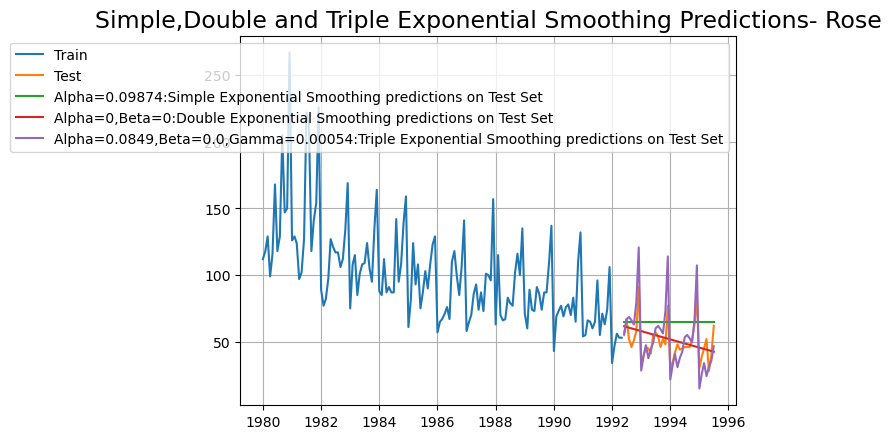

In [97]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

In [98]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 13.814671833097345


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [99]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Rose
Triple Exponential Smoothing (Additive Season)       13.814672

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

### Triple Exponential Smoothing with Addition Errors - Sparkling

In [100]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07598099751674124, 'smoothing_trend': 0.03257274357221863, 'smoothing_seasonal': 0.4450362933371945, 'damping_trend': nan, 'initial_level': 2356.513027095144, 'initial_trend': -0.2841091799644726, 'initial_seasons': array([-636.24881661, -722.99617594, -398.6414572 , -473.44844951,
       -808.44233273, -815.36768471, -384.24121167,   73.00094193,
       -237.46241616,  272.32482319, 1541.39826342, 2590.09573213]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1992-06-01    1476.403114
1992-07-01    2064.224362
1992-08-01    1829.890567
1992-09-01    2409.129067
1992-10-01    3294.833601
1992-11-01    4063.297803
1992-12-01    6280.011066
1993-01-01    1724.751858
1993-02-01    1714.565106
1993-03-01    1946.659740
1993-04-01    1752.574273
1993-05-01    1530.121731
1993-06-01    1480.600542
1993-07-01    2068.421791
1993-08-01    1834.087996
1993-09-01    2413.326495
1993-10-01    3299.031029
1993-11-01    4067.495231
1993-12-01    6284.208494
1994-01-01    1728.949287
1994-02-01    1718.762535
1994-03-01    1950.857169
1994-04-01    1756.771701
1994-05-01    1534.319160
1994-06-01    1484.797971
1994-07-01    2072.619219
1994-08-01    1838.285424
1994-09-01    2417.523924
1994-10-01    3303.228457
1994-11-01    4071.692660
1994-12-01    6288.405923
1995-01-01    1733.146715
1995-02-01    1722.959963
1995-03-01    1955.054597
1995-04-01    1760.969130
1995-05-01    1538.516588
1995-06-01    1488.995399
1995-07-01    2076.816648
Freq: MS, dt

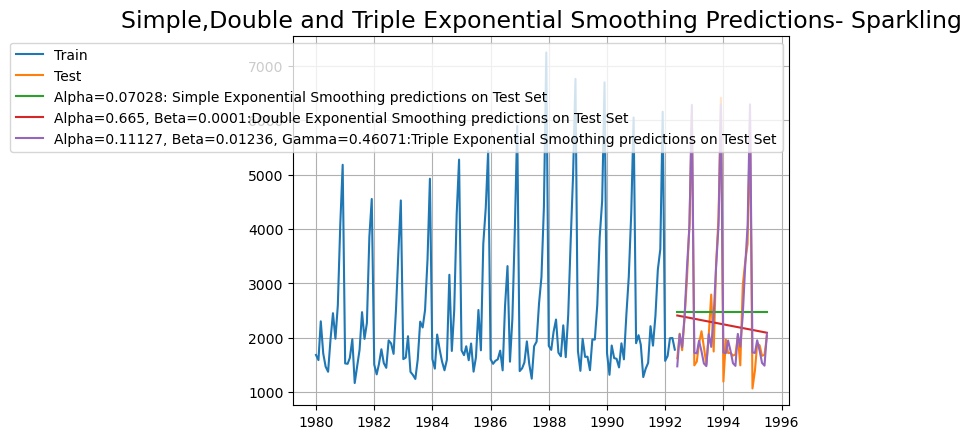

In [102]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

In [103]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 304.2694977244219


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           304.269498

In [105]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)       13.814672   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           304.269498

In [106]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     17.475054   
Simple Exponential Smoothing                         20.263217   
Double Exponential Smoothing                         13.723188   
Triple Exponential Smoothing (Additive Season)       13.814672   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1349.042457  
Simple Exponential Smoothing                            1329.402416  
Double Exponential Smoothing                            1340.452773  
Triple Exponential Smoothing (Additive Season)           304.269498

In [107]:
resultsDf = resultsDf12.copy()

### Taking MULTIPLICATIVE SEASONALITY- ROSE

In [108]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10083960059112543, 'smoothing_trend': 4.2965688424589217e-08, 'smoothing_seasonal': 3.991179137092285e-06, 'damping_trend': nan, 'initial_level': 181.56754345863402, 'initial_trend': -0.7341831930831001, 'initial_seasons': array([0.59897864, 0.67782031, 0.74567332, 0.65876679, 0.73211723,
       0.78910661, 0.88071328, 0.91994756, 0.87035829, 0.85355009,
       0.9938724 , 1.36382035]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1992-06-01    57.261352
1992-07-01    63.262227
1992-08-01    65.404902
1992-09-01    61.240479
1992-10-01    59.431138
1992-11-01    68.471884
1992-12-01    92.957663
1993-01-01    40.386411
1993-02-01    45.204826
1993-03-01    49.182585
1993-04-01    42.966883
1993-05-01    47.213414
1993-06-01    50.309174
1993-07-01    55.502969
1993-08-01    57.300000
1993-09-01    53.572443
1993-10-01    51.911187
1993-11-01    59.715659
1993-12-01    80.942137
1994-01-01    35.109300
1994-02-01    39.233089
1994-03-01    42.613048
1994-04-01    37.163002
1994-05-01    40.763314
1994-06-01    43.356996
1994-07-01    47.743712
1994-08-01    49.195098
1994-09-01    45.904407
1994-10-01    44.391237
1994-11-01    50.959435
1994-12-01    68.926611
1995-01-01    29.832189
1995-02-01    33.261353
1995-03-01    36.043512
1995-04-01    31.359120
1995-05-01    34.313214
1995-06-01    36.404818
1995-07-01    39.984454
Freq: MS, dtype: float64

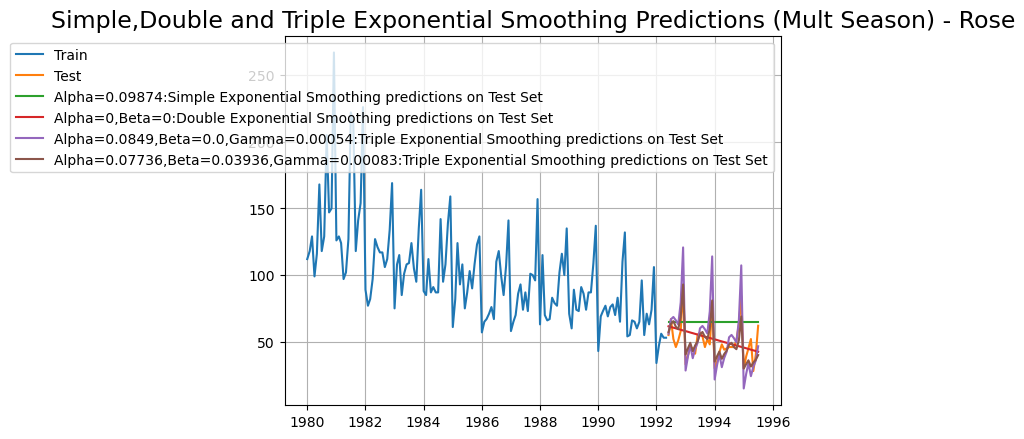

In [110]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

In [111]:
# Report model accuracy

print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 8.392115018764693


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [112]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...        8.392115

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

### Taking MULTIPLICATIVE SEASONALITY- Sparkling

In [113]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0757328850234233, 'smoothing_trend': 0.07573262633055354, 'smoothing_seasonal': 0.3423023599052249, 'damping_trend': nan, 'initial_level': 2356.760742772943, 'initial_trend': -14.58020794495644, 'initial_seasons': array([0.72011301, 0.68939017, 0.90421656, 0.80558073, 0.65571602,
       0.65073826, 0.88058645, 1.13049073, 0.91479668, 1.221325  ,
       1.89334721, 2.4219312 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [114]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1992-06-01    1487.911727
1992-07-01    2075.128788
1992-08-01    1939.980674
1992-09-01    2424.387567
1992-10-01    3329.536787
1992-11-01    4196.810761
1992-12-01    6369.197729
1993-01-01    1739.776035
1993-02-01    1707.074101
1993-03-01    1953.462086
1993-04-01    1771.791216
1993-05-01    1589.356856
1993-06-01    1504.808347
1993-07-01    2098.671525
1993-08-01    1961.969340
1993-09-01    2451.840801
1993-10-01    3367.204188
1993-11-01    4244.245004
1993-12-01    6441.117528
1994-01-01    1759.402795
1994-02-01    1726.313857
1994-03-01    1975.458123
1994-04-01    1791.722932
1994-05-01    1607.219536
1994-06-01    1521.704967
1994-07-01    2122.214261
1994-08-01    1983.958006
1994-09-01    2479.294035
1994-10-01    3404.871588
1994-11-01    4291.679248
1994-12-01    6513.037327
1995-01-01    1779.029555
1995-02-01    1745.553612
1995-03-01    1997.454161
1995-04-01    1811.654648
1995-05-01    1625.082216
1995-06-01    1538.601587
1995-07-01    2145.756997
Freq: MS, dt

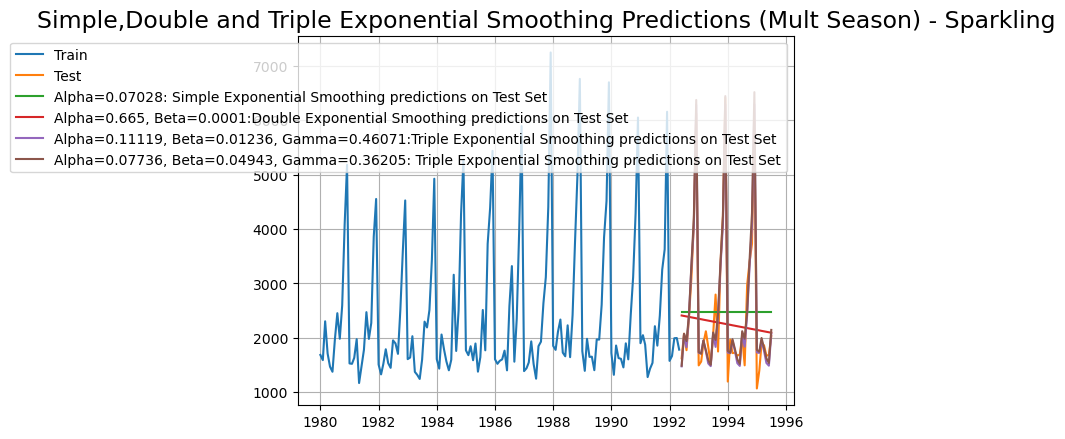

In [115]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

In [116]:
#Report model accuracy

print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 318.44806888606183


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           318.448069

In [118]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...        8.392115   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           318.448069

In [119]:
resultsDf14 = pd.concat([resultsDf5,resultsDf6,resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
SimpleAverageModel                                       52.184392   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.448930   
6pointTrailingMovingAverage                              14.560046   
9pointTrailingMovingAverage                              14.724503   
RegressionOnTime                                         17.475054   
Simple Exponential Smoothing                             20.263217   
Double Exponential Smoothing                             13.723188   
Triple Exponential Smoothing (Additive Season)           13.814672   
Triple Exponential Smoothing (Multiplicative Se...        8.392115   

                                                    Test RMSE Sparkling  
SimpleAverageModel                                          2705.474937  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
RegressionOnTime                                            1349.042457  
Simple Exponential Smoothing                                1329.402416  
Double Exponential Smoothing                                1340.452773  
Triple Exponential Smoothing (Additive Season)               304.269498  
Triple Exponential Smoothing (Multiplicative Se...           318.448069

In [120]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
SimpleAverageModel                                       52.184392   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.448930   
6pointTrailingMovingAverage                              14.560046   
9pointTrailingMovingAverage                              14.724503   
RegressionOnTime                                         17.475054   
Simple Exponential Smoothing                             20.263217   
Double Exponential Smoothing                             13.723188   
Triple Exponential Smoothing (Additive Season)           13.814672   
Triple Exponential Smoothing (Multiplicative Se...        8.392115   

                                                    Test RMSE Sparkling  
SimpleAverageModel                                          2705.474937  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
RegressionOnTime                                            1349.042457  
Simple Exponential Smoothing                                1329.402416  
Double Exponential Smoothing                                1340.452773  
Triple Exponential Smoothing (Additive Season)               304.269498  
Triple Exponential Smoothing (Multiplicative Se...           318.448069

In [121]:
resultsDf.to_csv('results_all.csv')

## ETS(A, Ad, A) - Holt Winter's linear method with additive errors - ROSE

### USING DAMPED TREND

In [122]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.12044282205681567, 'smoothing_trend': 0.007922525793050377, 'smoothing_seasonal': 0.004585546178639198, 'damping_trend': 0.966031375054944, 'initial_level': 153.10329214619384, 'initial_trend': -1.5096731543704698, 'initial_seasons': array([-30.97344609, -18.90845604, -10.37123171, -18.91661487,
       -11.77851997,  -5.83832632,   5.55778059,   7.56657622,
         5.52310582,   3.45309203,  21.02158762,  61.49602455]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [123]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

1992-06-01     60.101180
1992-07-01     71.421511
1992-08-01     73.337542
1992-09-01     71.200290
1992-10-01     69.027071
1992-11-01     86.509331
1992-12-01    126.941431
1993-01-01     34.423564
1993-02-01     46.382549
1993-03-01     54.831876
1993-04-01     46.180158
1993-05-01     53.248848
1993-06-01     59.093388
1993-07-01     70.447952
1993-08-01     72.397054
1993-09-01     70.291749
1993-10-01     68.149392
1993-11-01     85.661465
1993-12-01    126.122366
1994-01-01     33.632321
1994-02-01     45.618184
1994-03-01     54.093475
1994-04-01     45.466839
1994-05-01     52.559760
1994-06-01     58.427707
1994-07-01     69.804884
1994-08-01     71.775830
1994-09-01     69.691627
1994-10-01     67.569655
1994-11-01     85.101422
1994-12-01    125.581346
1995-01-01     33.109679
1995-02-01     45.113295
1995-03-01     53.605737
1995-04-01     44.995669
1995-05-01     52.104595
1995-06-01     57.988003
1995-07-01     69.380116
Freq: MS, dtype: float64

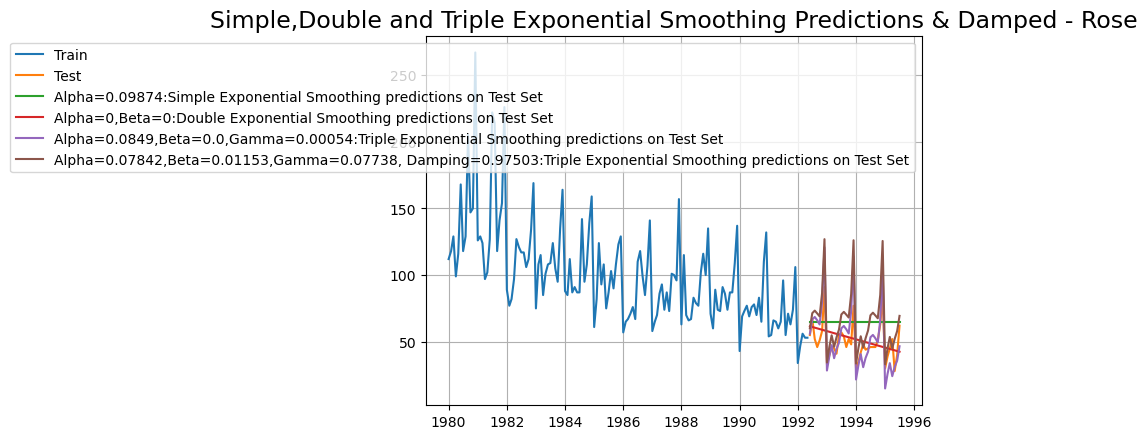

In [124]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [125]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 19.869174731909073


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [126]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       19.869175

## ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

### USING DAMPED TREND

In [127]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07602905879769392, 'smoothing_trend': 0.02174104490132095, 'smoothing_seasonal': 0.4450371691219554, 'damping_trend': 0.9900012874676822, 'initial_level': 2356.6210912037914, 'initial_trend': -1.713801464941569, 'initial_seasons': array([-636.24866235, -722.99405615, -398.62220587, -473.44569073,
       -808.44149221, -815.36659743, -384.23342503,   73.01825902,
       -237.46360216,  272.33260019, 1541.42483201, 2590.11905623]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [128]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

1992-06-01    1478.135880
1992-07-01    2065.883797
1992-08-01    1831.536027
1992-09-01    2410.576045
1992-10-01    3296.097114
1992-11-01    4064.352058
1992-12-01    6280.569326
1993-01-01    1724.789958
1993-02-01    1714.132259
1993-03-01    1945.917621
1993-04-01    1751.643385
1993-05-01    1529.985910
1993-06-01    1480.328281
1993-07-01    2068.054277
1993-08-01    1833.684805
1993-09-01    2412.703338
1993-10-01    3298.203137
1993-11-01    4066.437024
1993-12-01    6282.633445
1994-01-01    1726.833439
1994-02-01    1716.155307
1994-03-01    1947.920441
1994-04-01    1753.626179
1994-05-01    1531.948879
1994-06-01    1482.271623
1994-07-01    2069.978188
1994-08-01    1835.589480
1994-09-01    2414.588968
1994-10-01    3300.069914
1994-11-01    4068.285135
1994-12-01    6284.463077
1995-01-01    1728.644777
1995-02-01    1717.948535
1995-03-01    1949.695739
1995-04-01    1755.383726
1995-05-01    1533.688852
1995-06-01    1483.994199
1995-07-01    2071.683541
Freq: MS, dt

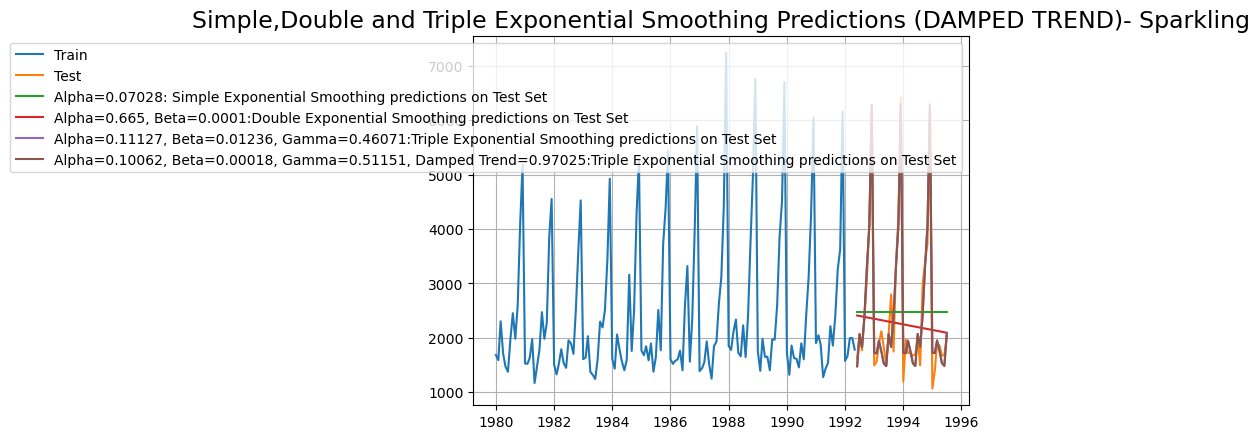

In [129]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [130]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 303.9393442065769


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [131]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           304.269498

In [132]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season, ...       19.869175   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...           304.269498

In [133]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
SimpleAverageModel                                       52.184392   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.448930   
6pointTrailingMovingAverage                              14.560046   
9pointTrailingMovingAverage                              14.724503   
RegressionOnTime                                         17.475054   
Simple Exponential Smoothing                             20.263217   
Double Exponential Smoothing                             13.723188   
Triple Exponential Smoothing (Additive Season)           13.814672   
Triple Exponential Smoothing (Multiplicative Se...        8.392115   
Triple Exponential Smoothing (Additive Season, ...       19.869175   

                                                    Test RMSE Sparkling  
SimpleAverageModel                                          2705.474937  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
RegressionOnTime                                            1349.042457  
Simple Exponential Smoothing                                1329.402416  
Double Exponential Smoothing                                1340.452773  
Triple Exponential Smoothing (Additive Season)               304.269498  
Triple Exponential Smoothing (Multiplicative Se...           318.448069  
Triple Exponential Smoothing (Additive Season, ...           304.269498

In [134]:
resultsDf = resultsDf12.copy()

### ETS(A, A, M) - Holt Winter's linear method - ROSE
### USING DAMPED TREND
### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

In [135]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.00012692870536149277, 'smoothing_trend': 1.843896692016477e-05, 'smoothing_seasonal': 0.0002583536115747452, 'damping_trend': 0.9848768204717204, 'initial_level': 208.90606426581655, 'initial_trend': -1.9547145088576034, 'initial_seasons': array([0.54292903, 0.61760937, 0.67839671, 0.59847107, 0.66248963,
       0.72266935, 0.80356027, 0.83422821, 0.80774011, 0.78254476,
       0.91171555, 1.25225402]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [136]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

1992-06-01     68.329074
1992-07-01     75.824428
1992-08-01     78.548444
1992-09-01     75.908254
1992-10-01     73.397262
1992-11-01     85.347884
1992-12-01    116.988692
1993-01-01     50.620872
1993-02-01     57.482865
1993-03-01     63.023813
1993-04-01     55.502850
1993-05-01     61.323649
1993-06-01     66.765739
1993-07-01     74.112295
1993-08-01     76.798048
1993-09-01     74.238908
1993-10-01     71.804378
1993-11-01     83.520067
1993-12-01    114.516351
1994-01-01     49.565253
1994-02-01     56.300046
1994-03-01     61.744208
1994-04-01     54.390946
1994-05-01     60.111517
1994-06-01     65.463667
1994-07-01     72.686291
1994-08-01     75.340176
1994-09-01     72.848541
1994-10-01     70.477694
1994-11-01     81.997712
1994-12-01    112.457184
1995-01-01     48.686047
1995-02-01     55.314898
1995-03-01     60.678449
1995-04-01     53.464863
1995-05-01     59.101955
1995-06-01     64.379196
1995-07-01     71.498600
Freq: MS, dtype: float64

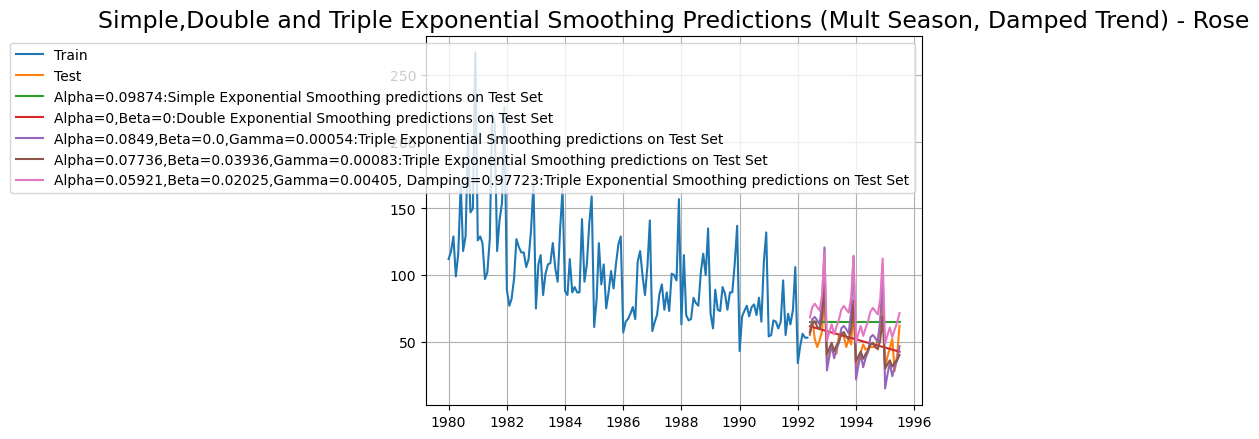

In [137]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

In [138]:
# Report model accuracy

print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 21.959061912462495


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [139]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       21.959062

### ETS(A, A, M) - Holt Winter's linear method - SPARKLING
### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY
### USING DAMPED TREND

In [140]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07659343696897374, 'smoothing_trend': 0.06562704356040412, 'smoothing_seasonal': 0.34209781963178026, 'damping_trend': 0.9899081044827059, 'initial_level': 2356.196008865902, 'initial_trend': -17.346467956618092, 'initial_seasons': array([0.7202566 , 0.68884446, 0.90498526, 0.80768293, 0.66014891,
       0.65518425, 0.88640599, 1.13839824, 0.92308822, 1.22733879,
       1.90299903, 2.43522329]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [141]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1992-06-01    1492.760622
1992-07-01    2081.648113
1992-08-01    1945.838259
1992-09-01    2432.018639
1992-10-01    3339.451860
1992-11-01    4208.708249
1992-12-01    6385.122739
1993-01-01    1743.548313
1993-02-01    1709.839755
1993-03-01    1956.632621
1993-04-01    1774.366921
1993-05-01    1593.967249
1993-06-01    1508.578821
1993-07-01    2103.463554
1993-08-01    1966.006020
1993-09-01    2456.948309
1993-10-01    3373.307252
1993-11-01    4250.907895
1993-12-01    6448.442727
1994-01-01    1760.649307
1994-02-01    1726.426559
1994-03-01    1975.405921
1994-04-01    1791.205400
1994-05-01    1608.928604
1994-06-01    1522.584224
1994-07-01    2122.778903
1994-08-01    1983.862516
1994-09-01    2479.020990
1994-10-01    3403.282750
1994-11-01    4288.271380
1994-12-01    6504.506121
1995-01-01    1775.790493
1995-02-01    1741.112483
1995-03-01    1992.027765
1995-04-01    1806.114156
1995-05-01    1622.175359
1995-06-01    1534.984580
1995-07-01    2139.880675
Freq: MS, dt

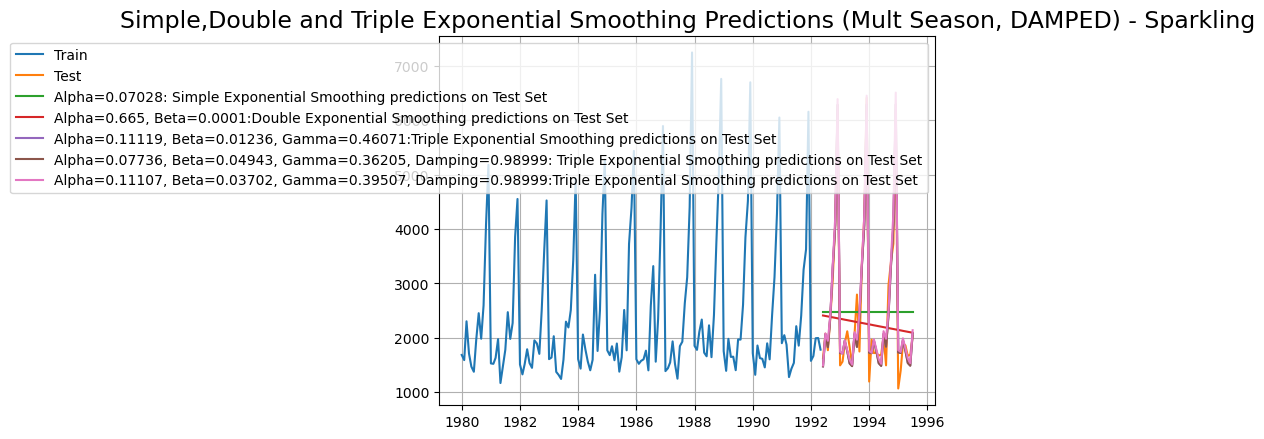

In [142]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

In [143]:
# Report model ac curacy
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 318.39316013332007


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [144]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...            318.39316

In [145]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       21.959062   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...            318.39316

In [146]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
SimpleAverageModel                                       52.184392   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.448930   
6pointTrailingMovingAverage                              14.560046   
9pointTrailingMovingAverage                              14.724503   
RegressionOnTime                                         17.475054   
Simple Exponential Smoothing                             20.263217   
Double Exponential Smoothing                             13.723188   
Triple Exponential Smoothing (Additive Season)           13.814672   
Triple Exponential Smoothing (Multiplicative Se...        8.392115   
Triple Exponential Smoothing (Additive Season, ...       19.869175   
Triple Exponential Smoothing (Multiplicative Se...       21.959062   

                                                    Test RMSE Sparkling  
SimpleAverageModel                                          2705.474937  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
RegressionOnTime                                            1349.042457  
Simple Exponential Smoothing                                1329.402416  
Double Exponential Smoothing                                1340.452773  
Triple Exponential Smoothing (Additive Season)               304.269498  
Triple Exponential Smoothing (Multiplicative Se...           318.448069  
Triple Exponential Smoothing (Additive Season, ...           304.269498  
Triple Exponential Smoothing (Multiplicative Se...           318.393160

In [147]:
resultsDf = resultsDf14.copy()

In [148]:
resultsDf.to_csv('results_all.csv')

### Best model:- 

##### Rose — Triple Exponential Smoothing (Multiplicative Season)
##### Sparkling — Triple Exponential Smoothing (Additive Season)

### D. Check for Stationarity

The hypothesis in a simple form for the ADF test is:

𝐻0
  : The Time Series has a unit root and is thus non-stationary.;
𝐻1
  : The Time Series does not have a unit root and is thus stationary.

In [149]:
from statsmodels.tsa.stattools import adfuller

dfrs = adfuller(rose_data,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.241
DF test p-value is 0.46692256831407475
Number of lags used 13


5% of significance level reveals its non-stationary.

To solve this issue, we'll apply a single level of difference to determine, if the series becomes stationary.

In [150]:
dfrs = adfuller(sparkling_data.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


p-value less than the significance level of 0.0, we reject the Null Hypothesis.

It conclude that after applying a lag of 10, the Rose data becomes stationary.

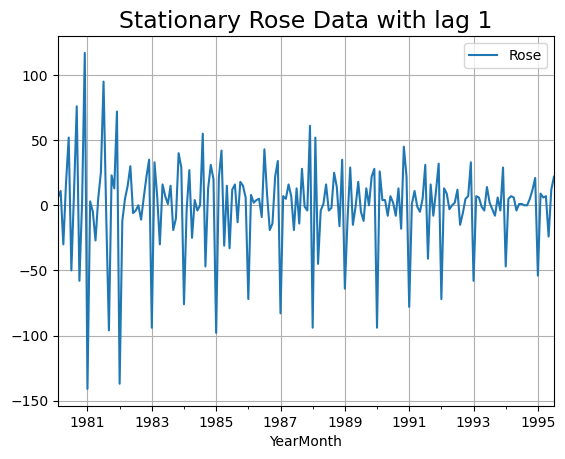

In [151]:
rose_data.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

### Check Stationarity of SPARKLING Data

In [152]:
dfss = adfuller(sparkling_data,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932516
Number of lags used 12


Significance level of 7%, the Time Series appears to be non-stationary.

Let's apply one level of differencing, if the series achieves stationarity.

In [153]:
dfss = adfuller(sparkling_data.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


p-value less than the significance level 0.05, so we reject the null hypothesis.

As a result, after applying a lag of 10, the Sparkling data becomes stationary.

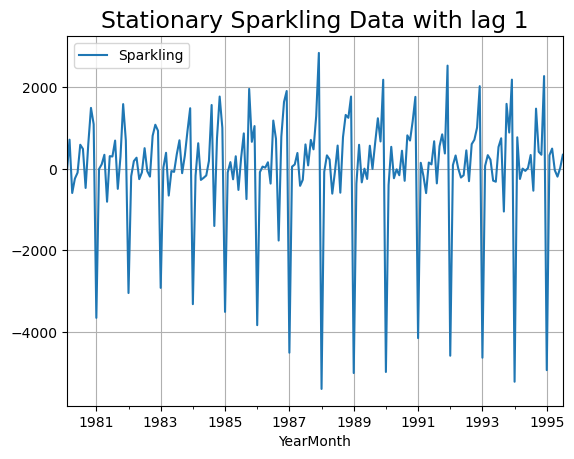

In [154]:
sparkling_data.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');

### E. Model Building - Stationary Data + F. Compare the performance of the models

#### Check for Stationarity of Rose Train Data

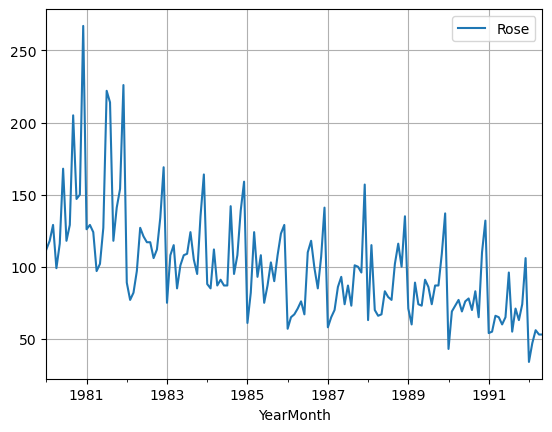

In [155]:
rtrain.plot(grid=True);

In [156]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.105
DF test p-value is 0.543175168410827
Number of lags used 13


In [157]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.185
DF test p-value is 5.371946645687995e-09
Number of lags used 12


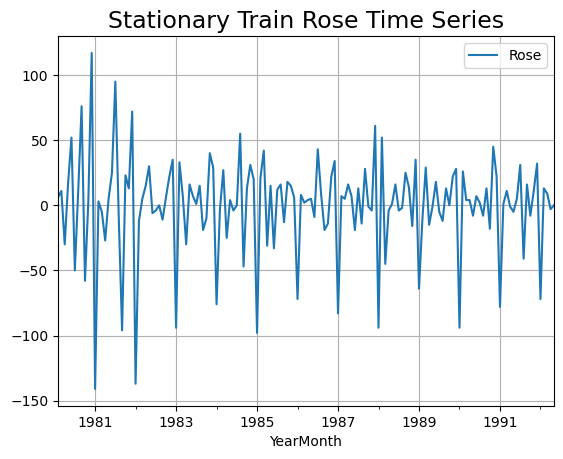

In [158]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [159]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 1980-01-01 to 1992-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    149 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


### Automated version of an ARIMA model for that the best parameters are selected with the lowest Akaike Information Criteria (AIC).

Acknowledging the seasonality in the data, it's indeed prudent to consider a SARIMA model. However, before proceeding, let's test whether an ARIMA or SARIMA model better fits the data by comparing their Akaike Information Criteria (AIC) values. We'll choose the model with the lowest AIC as the preferred option.

In [160]:


import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [161]:

ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [162]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize an empty DataFrame with columns 'param' and 'AIC'
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
  ARIMA_model = ARIMA(rtrain['Rose'].values, order=param).fit()
  print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
  # Create a DataFrame with a single row for the current parameter and AIC
  new_row = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
  # Concatenate the existing DataFrame with the new row
  ROSE_ARIMA_AIC = pd.concat([ROSE_ARIMA_AIC, new_row], ignore_index=True)



ARIMA(0, 1, 0) - AIC:1499.1786931796523
ARIMA(0, 1, 1) - AIC:1438.6436090916682
ARIMA(0, 1, 2) - AIC:1436.1992828019975
ARIMA(0, 1, 3) - AIC:1436.5480262079816
ARIMA(1, 1, 0) - AIC:1480.559364625044
ARIMA(1, 1, 1) - AIC:1437.1555425056213
ARIMA(1, 1, 2) - AIC:1435.6572959808964
ARIMA(1, 1, 3) - AIC:1437.6403967056976
ARIMA(2, 1, 0) - AIC:1457.8711788191413
ARIMA(2, 1, 1) - AIC:1437.7048136270441
ARIMA(2, 1, 2) - AIC:1437.6378674876164
ARIMA(2, 1, 3) - AIC:1432.0269461905864
ARIMA(3, 1, 0) - AIC:1456.0247365265436
ARIMA(3, 1, 1) - AIC:1438.5688150662477


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1439.5208503873787
ARIMA(3, 1, 3) - AIC:1432.2168004049004


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [163]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1432.026946
15  (3, 1, 3)  1432.216800
6   (1, 1, 2)  1435.657296
2   (0, 1, 2)  1436.199283
3   (0, 1, 3)  1436.548026

In [164]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -710.013
Date:                Sun, 14 Apr 2024   AIC                           1432.027
Time:                        14:06:12   BIC                           1450.010
Sample:                    01-01-1980   HQIC                          1439.334
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6866      0.052    -32.345      0.000      -1.789      -1.584
ar.L2         -0.8565      0.052    -16.460      0.000      -0.959      -0.755
ma.L1          0.9594      0.076     12.546      0.0

### Rose Train Diagnostics plot.¶

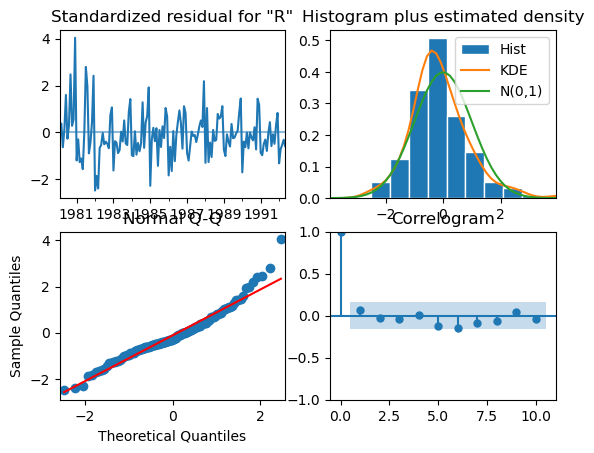

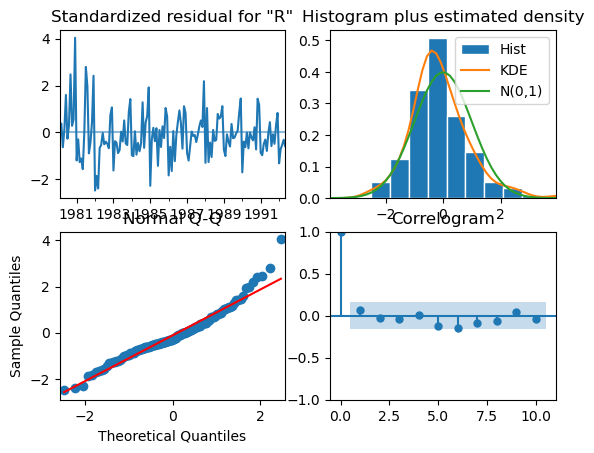

In [165]:

results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

### Predict on the Rose Test by using this model and evaluate the model.

In [166]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1992-06-01    58.882506
1992-07-01    68.514611
1992-08-01    62.233704
1992-09-01    64.577019
1992-10-01    66.004548
1992-11-01    61.589686
1992-12-01    67.813208
1993-01-01    61.097907
1993-02-01    67.093472
1993-03-01    62.733067
1993-04-01    64.952037
1993-05-01    64.944305
1993-06-01    63.056711
1993-07-01    66.247014
1993-08-01    62.482938
1993-09-01    66.098937
1993-10-01    63.224149
1993-11-01    64.975619
1993-12-01    64.483899
1994-01-01    63.813048
1994-02-01    65.365706
1994-03-01    63.321550
1994-04-01    65.439381
1994-05-01    63.618275
1994-06-01    64.875808
1994-07-01    64.314659
1994-08-01    64.183986
1994-09-01    64.885030
1994-10-01    63.814552
1994-11-01    65.019585
1994-12-01    63.904042
1995-01-01    64.753397
1995-02-01    64.276352
1995-03-01    64.353446
1995-04-01    64.632024
1995-05-01    64.096130
1995-06-01    64.761374
1995-07-01    64.098366
Freq: MS, Name: predicted_mean, dtype: float64

In [167]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 19.678446267389837 
MAPE: 41.47588810525417


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [168]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       19.678446       41.475888

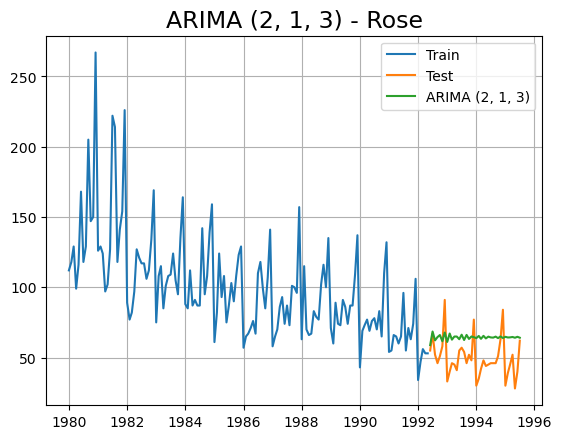

In [169]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

### ARIMA model for that the best parameters are selected at the ACF and the PACF plots on ROSE dataset
Lets look at the ACF and the PACF plots

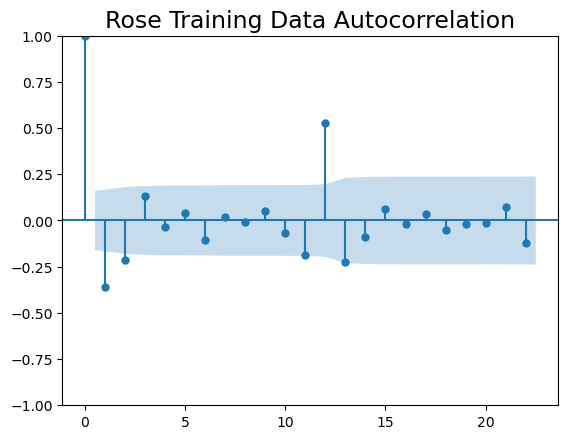

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');


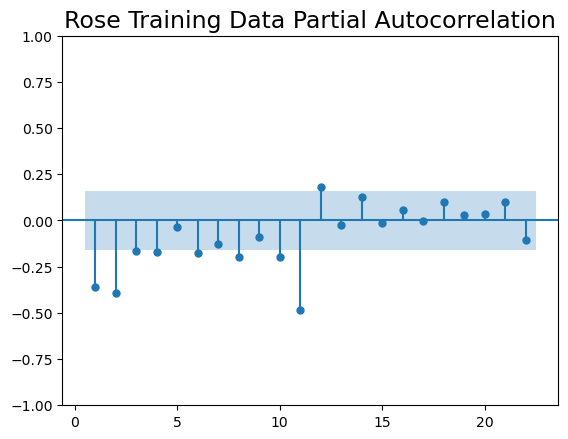

In [171]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');



The significance level of 0.05 and analyzing the characteristics of the PACF and ACF plots, we select the Auto-Regressive (AR) parameter 'p' as 2 and the Moving-Average (MA) parameter 'q' also as 2. This decision is guided by identifying significant lags in both plots before they cut off. The significant lag in the PACF plot before it terminates informs the choice of 'p', while the significant lag in the ACF plot before it cuts off guides the selection of 'q'. These parameter values are crucial for constructing ARIMA or SARIMA models, providing insights into the temporal dependencies within the time series data.

In [172]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -713.819
Date:                Sun, 14 Apr 2024   AIC                           1437.638
Time:                        14:06:15   BIC                           1452.624
Sample:                    01-01-1980   HQIC                          1443.727
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4822      0.389     -1.238      0.216      -1.245       0.281
ar.L2         -0.0144      0.144     -0.100      0.921      -0.297       0.268
ma.L1         -0.2317      0.382     -0.607      0.5

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


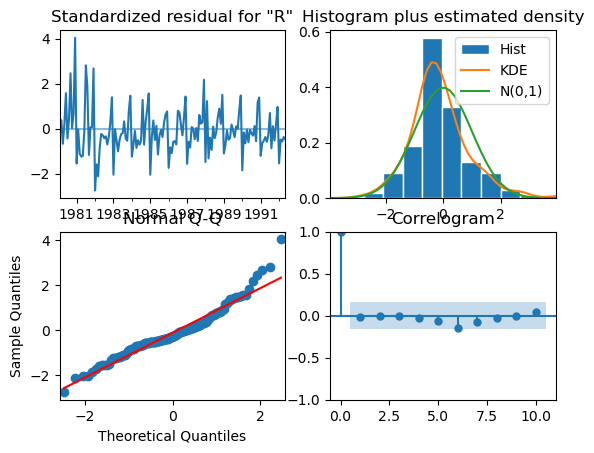

In [173]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

### Predict on the Test by using this model and evaluate the model.

In [174]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [175]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 20.75608467260816 
MAPE: 44.22705986483823


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [176]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       19.678446       41.475888
ARIMA(2,1,2)       20.756085       44.227060

In [177]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       19.678446       41.475888
ARIMA(2,1,2)       20.756085       44.227060

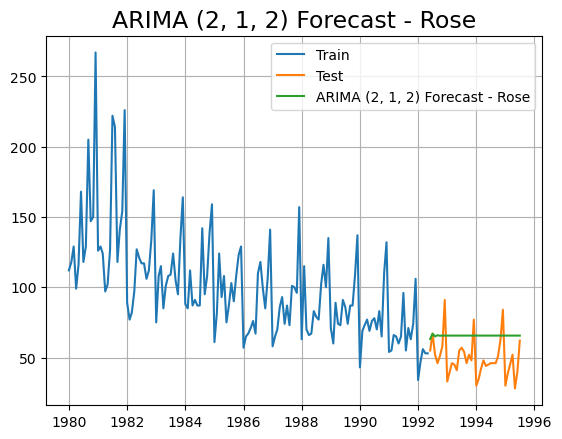

In [178]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

### Automated version of a SARIMA model for that the best parameters are selected with the lowest Akaike Information Criteria (AIC) - ROSE DATA

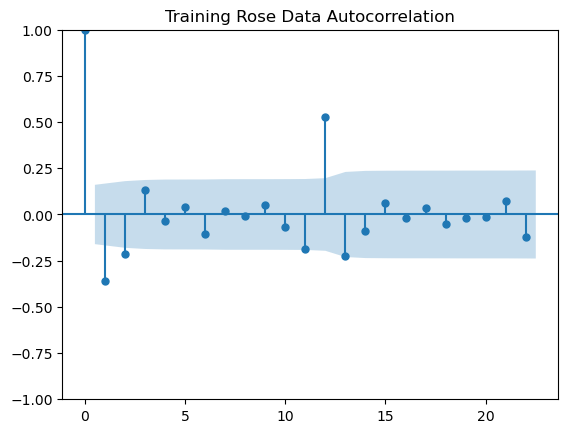

In [179]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

In [180]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [181]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [182]:
import pandas as pd
import statsmodels.api as sm

# Initialize an empty DataFrame with columns 'param', 'seasonal', and 'AIC'
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                             order=param,
                                             seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

    results_SARIMA = SARIMA_model.fit(maxiter=1000)
    print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

    # Create a DataFrame with a single row for the current parameters and AIC
    new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})

    # Concatenate the existing DataFrame with the new row, ignoring the index
    SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1490.0345452860875
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1302.6978293542074
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1125.1581817890449
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:1015.1383797637212
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1290.8077973421262
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1264.7364079287177
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1113.3942533886136
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:976.1261896616173
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1102.8305224014357
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1104.8305217744355
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1097.4032249308598
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:975.3917718594588
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:991.5714902992218
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:991.2295150127351
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:990.7881498521008
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:973.656055104371
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1419.9674001674066
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1246.4892340582076
SARIMA(0, 1, 1)x(

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:919.2842329434305
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1033.421641666485
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1034.6568741292685
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1036.43402646289
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:917.1498008898878
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:920.9293696583378
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:920.700300588589
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:919.7046260423374
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:915.8585850060259
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1409.7922463746158
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1234.5361016136403
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1055.1521665826785
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:948.6084688757688
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1216.6267375794205
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1187.9869975717986
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1044.8831603437989
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:907.1399950135186
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1034.3377239560732
SARIMA(2, 1, 2)x(2, 0,

In [183]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
191  (2, 1, 3)  (3, 0, 3, 12)  895.745639
187  (2, 1, 3)  (2, 0, 3, 12)  896.070191
59   (0, 1, 3)  (2, 0, 3, 12)  896.576434
63   (0, 1, 3)  (3, 0, 3, 12)  896.779620
55   (0, 1, 3)  (1, 0, 3, 12)  897.714188

In [184]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  149
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -443.427
Date:                                 Sun, 14 Apr 2024   AIC                            906.854
Time:                                         14:10:44   BIC                            933.768
Sample:                                     01-01-1980   HQIC                           917.769
                                          - 05-01-1992                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0322      0.115      0.279      0.780      -0.194       0

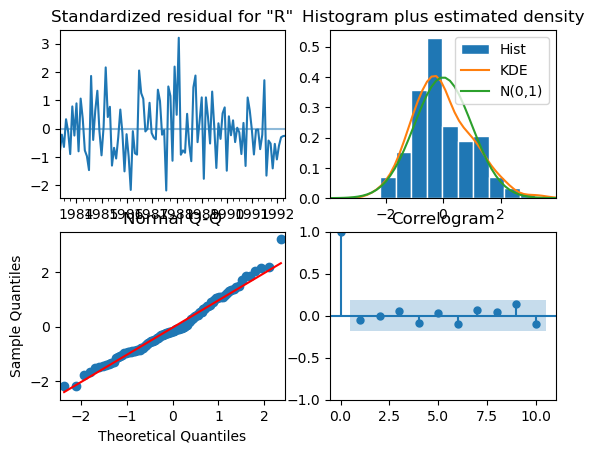

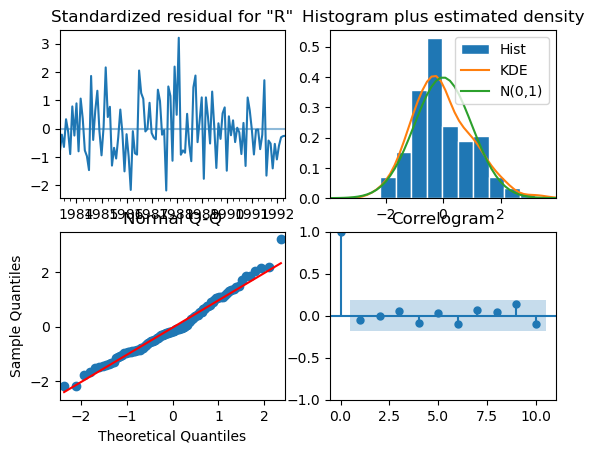

In [185]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

### Predict on the Test by using this model and evaluate the model.

In [186]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1992-06-01  58.080763  13.625917      31.374456      84.787070
1992-07-01  69.518723  13.750725      42.567797      96.469648
1992-08-01  58.898673  13.815821      31.820162      85.977184
1992-09-01  64.408080  13.839230      37.283688      91.532472
1992-10-01  62.989377  13.880154      35.784776      90.193978

In [187]:
predicted_auto_SARIMA1

In [188]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 9.097917263244303 
MAPE: 15.202669547064026


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [189]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       19.678446       41.475888
ARIMA(2,1,2)                       20.756085       44.227060
SARIMA(3, 1, 1)(3, 0, 2, 12)        9.097917       15.202670

In [190]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       19.678446       41.475888
ARIMA(2,1,2)                       20.756085       44.227060
SARIMA(3, 1, 1)(3, 0, 2, 12)        9.097917       15.202670

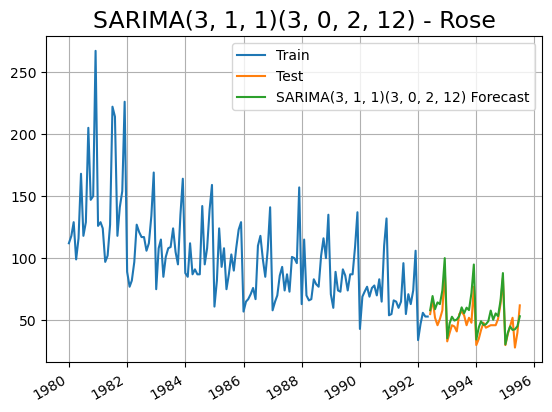

In [191]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

### SARIMA model for which the best parameters are selected at the ACF and the PACF plots. - Seasonality at 12 months

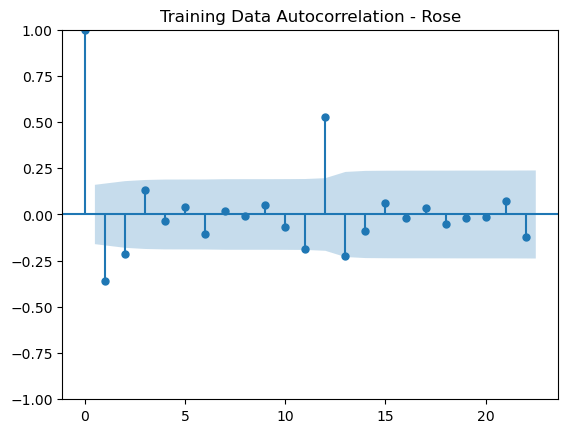

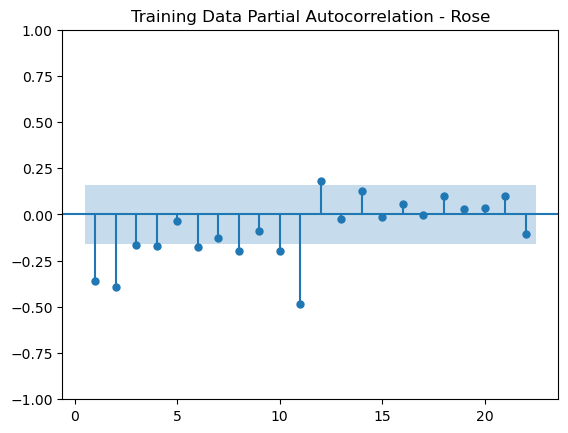

In [192]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

Given the significance level of 0.05 and a seasonal period of 12, we're setting the Auto-Regressive (AR) parameter 'p' and the Moving-Average (MA) parameter 'q' to 2, consistent with the ARIMA model.

For the seasonal component, we observe that the PACF plot cuts off after a significant lag, suggesting an Auto-Regressive Seasonal (SAR) parameter 'P' of 2. Similarly, the ACF plot cuts off after a significant lag, indicating a Moving-Average Seasonal (SMA) parameter 'Q' of 3.

In [193]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  149
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -446.668
Date:                            Sun, 14 Apr 2024   AIC                            911.337
Time:                                    14:10:48   BIC                            935.559
Sample:                                01-01-1980   HQIC                           921.160
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2986      2.204     -0.135      0.892      -4.618       4.021
ar.L2          0.0469      0.200   

In [194]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  149
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -401.627
Date:                            Sun, 14 Apr 2024   AIC                            823.255
Time:                                    14:10:53   BIC                            849.104
Sample:                                01-01-1980   HQIC                           833.710
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8195      0.324     -2.528      0.011      -1.455      -0.184
ar.L2         -0.0171      0.144   

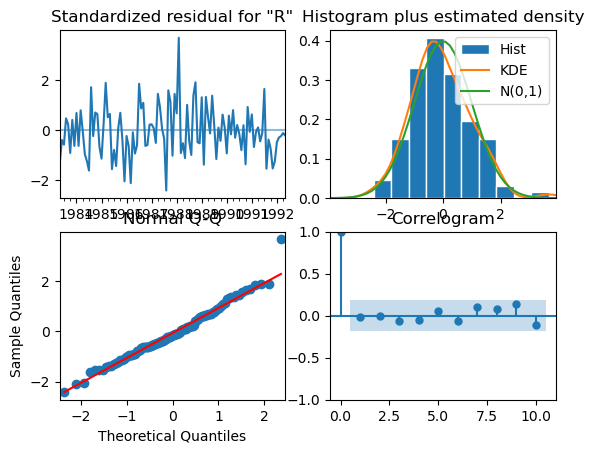

In [195]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

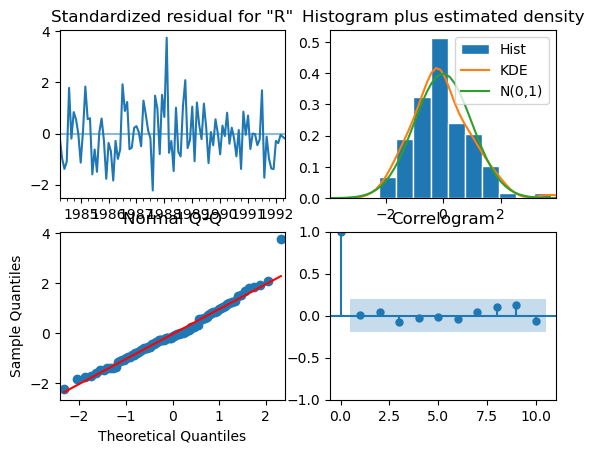

In [196]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

### Predict on the Test by using this model and evaluate the model.

In [197]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 12.166172146045588 
MAPE: 18.34290421559828


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [198]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 11.958335391994343 
MAPE: 18.25040246245028


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [199]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       19.678446       41.475888
ARIMA(2,1,2)                       20.756085       44.227060
SARIMA(3, 1, 1)(3, 0, 2, 12)        9.097917       15.202670
SARIMA(2,1,2)(3,1,2,12)            11.958335       18.250402

In [200]:
resultsR0 = resultsDf.copy()

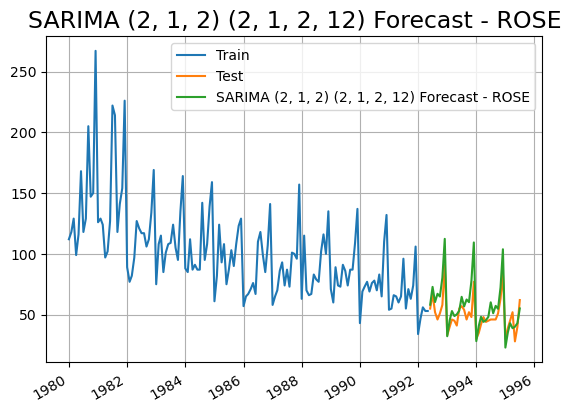

In [201]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

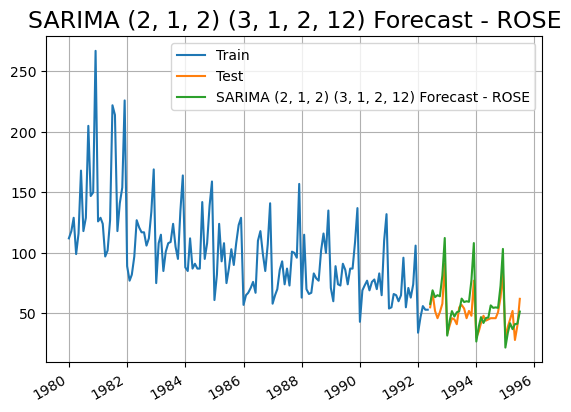

In [202]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

In [203]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_data['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -588.470
Date:                            Sun, 14 Apr 2024   AIC                           1194.940
Time:                                    14:10:57   BIC                           1221.854
Sample:                                01-01-1980   HQIC                          1205.875
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3834      1.966     -0.195      0.845      -4.236       3.469
ar.L2          0.0432      0.200   

### Forecast for the next 12 months

In [204]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.569439  12.870898      18.342942      68.795937
1995-09-01  43.669957  13.066384      18.060315      69.279599
1995-10-01  45.502658  13.131745      19.764911      71.240405
1995-11-01  57.568925  13.187539      31.721823      83.416027
1995-12-01  84.974279  13.242781      59.018906     110.929653

In [205]:
rmse = mean_squared_error(rose_data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.08076259056516


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


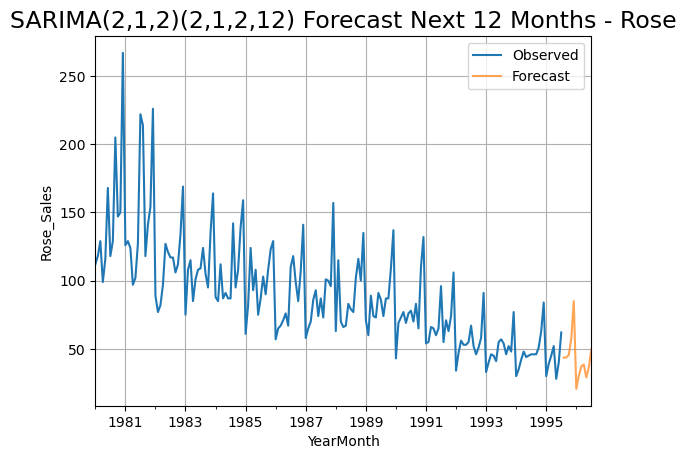

In [206]:
axis = rose_data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [207]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       19.678446       41.475888
ARIMA(2,1,2)                       20.756085       44.227060
SARIMA(3, 1, 1)(3, 0, 2, 12)        9.097917       15.202670
SARIMA(2,1,2)(3,1,2,12)            11.958335       18.250402

In [208]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [209]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
SimpleAverageModel                                       52.184392   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.448930   
6pointTrailingMovingAverage                              14.560046   
9pointTrailingMovingAverage                              14.724503   
RegressionOnTime                                         17.475054   
Simple Exponential Smoothing                             20.263217   
Double Exponential Smoothing                             13.723188   
Triple Exponential Smoothing (Additive Season)           13.814672   
Triple Exponential Smoothing (Multiplicative Se...        8.392115   
Triple Exponential Smoothing (Additive Season, ...       19.869175   
Triple Exponential Smoothing (Multiplicative Se...       21.959062   
ARIMA(2,1,3)                                             19.678446   
ARIMA(2,1,2)                                             20.756085   
SARIMA(3, 1, 1)(3, 0, 2, 12)                              9.097917   
SARIMA(2,1,2)(3,1,2,12)                                  11.958335   

                                                    Test RMSE Sparkling  \
SimpleAverageModel                                          2705.474937   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
RegressionOnTime                                            1349.042457   
Simple Exponential Smoothing                                1329.402416   
Double Exponential Smoothing                                1340.452773   
Triple Exponential Smoothing (Additive Season)               304.269498   
Triple Exponential Smoothing (Multiplicative Se...           318.448069   
Triple Exponential Smoothing (Additive Season, ...           304.269498   
Triple Exponential Smoothing (Multiplicative Se...           318.393160   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
RegressionOnTime                                               NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             41.475888  
ARIMA(2,1,2)                                             44.227060  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             15.202670  
SARIMA(2,1,2)(3,1,2,12)                                  18.250402

In [210]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')

In [211]:
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(3, 1, 1)(3, 0, 2, 12)        9.097917       15.202670
SARIMA(2,1,2)(3,1,2,12)            11.958335       18.250402
ARIMA(2,1,3)                       19.678446       41.475888
ARIMA(2,1,2)                       20.756085       44.227060

### ARIMA / SARIMA Model on SPARKLING dataset
#### Check for stationarity of the Training Data - Sparkling

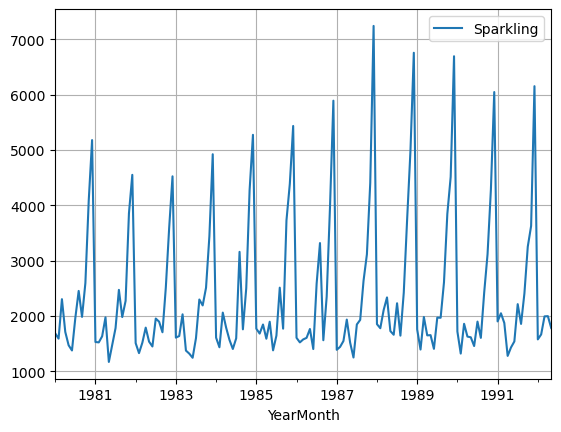

In [212]:
strain.plot(grid=True);

In [213]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.148
DF test p-value is 0.5192368933802338
Number of lags used 12


In [214]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.688
DF test p-value is 1.855404942391009e-12
Number of lags used 11


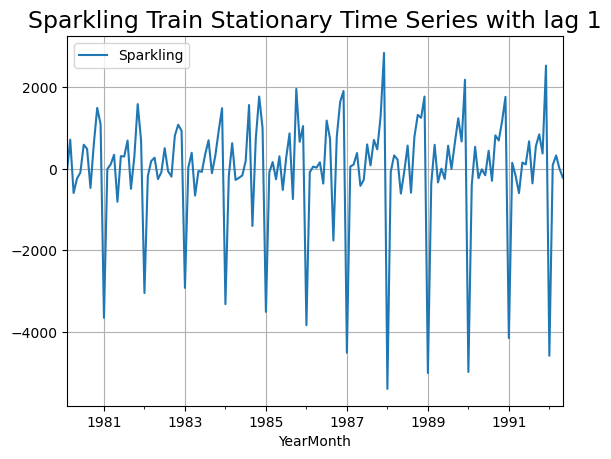

In [215]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [216]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 1980-01-01 to 1992-05-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  149 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


### Automated version of an ARIMA model for which the best parameters are selected at the lowest Akaike Information Criteria (AIC) - SPARKLING

In [217]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [218]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [219]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize an empty DataFrame with columns 'param' and 'AIC'
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
  ARIMA_model = ARIMA(strain['Sparkling'].values, order=param).fit()
  print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

  # Create a DataFrame with a single row for the current parameter and AIC
  new_row = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})

  # Concatenate the existing DataFrame with the new row, ignoring the index
  ARIMA_AIC = pd.concat([ARIMA_AIC, new_row], ignore_index=True)


ARIMA(0, 1, 0) - AIC:2569.144555918453
ARIMA(0, 1, 1) - AIC:2548.768349012923
ARIMA(0, 1, 2) - AIC:2523.5414888725727
ARIMA(0, 1, 3) - AIC:2523.8576354881925
ARIMA(1, 1, 0) - AIC:2565.740479972414
ARIMA(1, 1, 1) - AIC:2524.8852665668974
ARIMA(1, 1, 2) - AIC:2524.3341772982276
ARIMA(1, 1, 3) - AIC:2525.5864479032416
ARIMA(2, 1, 0) - AIC:2558.9143889710504
ARIMA(2, 1, 1) - AIC:2523.4170160869144


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:2503.99963716696


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:2522.650095177626
ARIMA(3, 1, 0) - AIC:2555.5506167400163
ARIMA(3, 1, 1) - AIC:2524.773766714636


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2519.4842414937293
ARIMA(3, 1, 3) - AIC:2519.521217123617


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [220]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2503.999637
14  (3, 1, 2)  2519.484241
15  (3, 1, 3)  2519.521217
11  (2, 1, 3)  2522.650095
9   (2, 1, 1)  2523.417016

In [221]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  149
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1247.000
Date:                Sun, 14 Apr 2024   AIC                           2504.000
Time:                        14:11:00   BIC                           2518.986
Sample:                    01-01-1980   HQIC                          2510.088
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2623      0.046     27.247      0.000       1.171       1.353
ar.L2         -0.5031      0.081     -6.196      0.000      -0.662      -0.344
ma.L1         -1.9387      0.059    -32.698      0.0

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Diagnostics - Sparkling

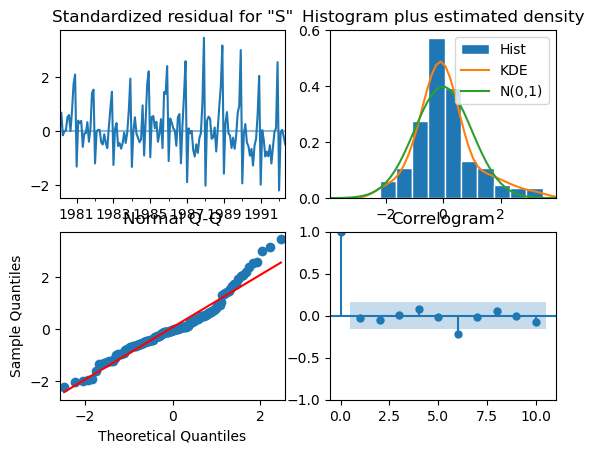

In [222]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

### Predict on the Test by using this model and evaluate the model.

In [223]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error


rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1326.6237985536354 
MAPE: 40.73651970831712


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [224]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf

RMSE      MAPE
ARIMA(2,1,2)  1326.623799  40.73652

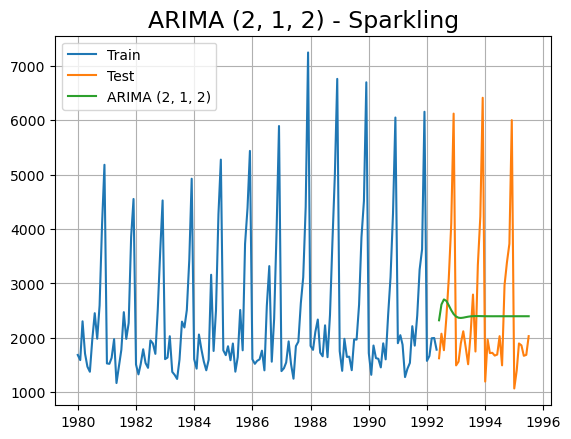

In [225]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

### ARIMA model for which the best parameters are selected at the ACF and the PACF plots - SPARKLING

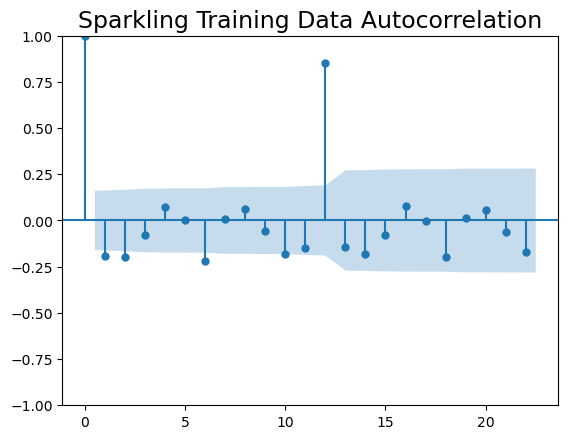

In [226]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');


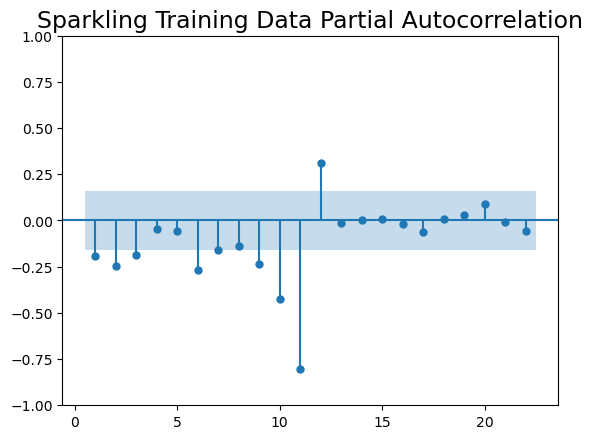

In [227]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');

In [228]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  149
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1283.572
Date:                Sun, 14 Apr 2024   AIC                           2569.145
Time:                        14:11:02   BIC                           2572.142
Sample:                    01-01-1980   HQIC                          2570.362
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.985e+06   1.29e+05     15.350      0.000    1.73e+06    2.24e+06
Ljung-Box (L1) (Q):                   5.43   Jarque-Bera (JB):               200.21
Prob(Q):                              0.02   Pr

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


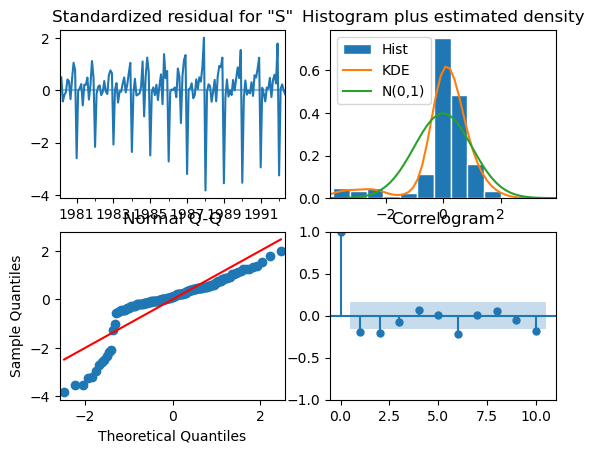

In [229]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

### Predict on the Test by using this model and evaluate the model.

In [230]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1490.2074475864442 
MAPE: 25.510451271088026


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [231]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,2)  1326.623799  40.736520
ARIMA(0,1,0)  1490.207448  25.510451

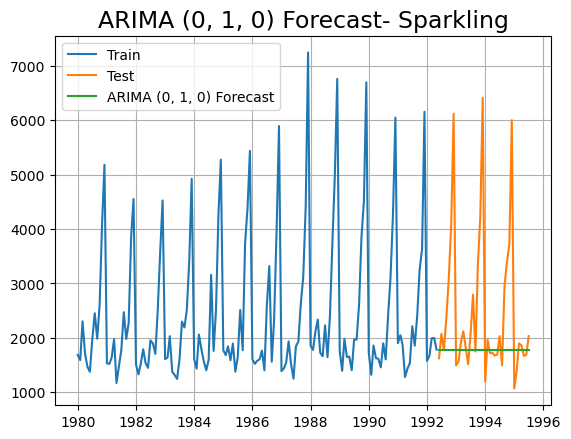

In [232]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

### Automated version of a SARIMA model for which the best parameters are selected at lowest Akaike Information Criteria (AIC) - SPARKLING

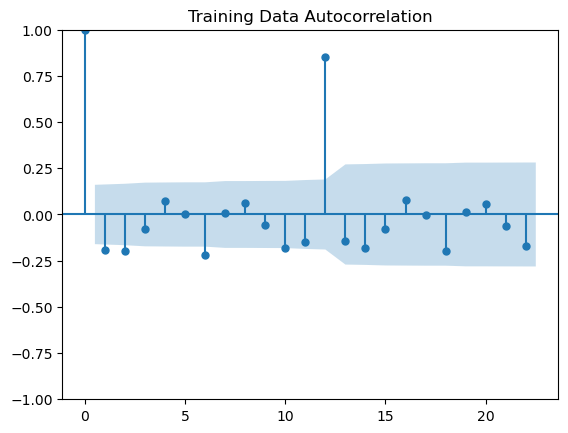

In [233]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [234]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [235]:
import pandas as pd
import statsmodels.api as sm

# Initialize an empty DataFrame with columns 'param', 'seasonal', and 'AIC'
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                             order=param,
                                             seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

    results_SARIMA = SARIMA_model.fit(maxiter=1000)
    print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

    # Create a DataFrame with a single row for the current parameters and AIC
    new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})

    # Concatenate the existing DataFrame with the new row, ignoring the index
    SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2552.801193879039
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2243.3800991971975
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1999.2900395327524
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:1786.995096523826
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:2095.6933312954657
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:2064.1436675047266
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1886.9068119618257
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:1709.3311655223117
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1903.3395093692975
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1903.1462807791895
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1887.2415731288881
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:1710.828200017602
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1724.7987107332874
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1726.52889916216
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1727.6274658071688
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:1702.988785183592
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2526.6677450030957
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2201.248750991459
SARIMA(0, 1, 1)x(

SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1820.4365344981184
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:1650.314093407922
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1824.001294266699
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1821.8914490408272
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1821.2412817489585
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:1651.533474067561
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1650.6010385406585
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1652.0201013540786
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1653.0525074160182
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:1650.8963029757917
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2466.623044329881
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:2171.0217412381535
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1929.1161669036135
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:1720.3215145812305
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:2005.5026070169718
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1974.6866157934319
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1805.478884866499
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:1635.7949329121986
SARIMA(2, 1, 2)

In [236]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 12)  1618.255188
55   (0, 1, 3)  (1, 0, 3, 12)  1619.515512
119  (1, 1, 3)  (1, 0, 3, 12)  1619.950467
59   (0, 1, 3)  (2, 0, 3, 12)  1620.537987
123  (1, 1, 3)  (2, 0, 3, 12)  1620.824678
183  (2, 1, 3)  (1, 0, 3, 12)  1621.324467
127  (1, 1, 3)  (3, 0, 3, 12)  1621.341381
63   (0, 1, 3)  (3, 0, 3, 12)  1621.515538
247  (3, 1, 3)  (1, 0, 3, 12)  1623.640823
255  (3, 1, 3)  (3, 0, 3, 12)  1624.655340
251  (3, 1, 3)  (2, 0, 3, 12)  1624.962989
191  (2, 1, 3)  (3, 0, 3, 12)  1627.138287
103  (1, 1, 2)  (1, 0, 3, 12)  1630.701972
107  (1, 1, 2)  (2, 0, 3, 12)  1631.793237
39   (0, 1, 2)  (1, 0, 3, 12)  1631.848671
111  (1, 1, 2)  (3, 0, 3, 12)  1631.949625
43   (0, 1, 2)  (2, 0, 3, 12)  1632.731605
171  (2, 1, 2)  (2, 0, 3, 12)  1633.792113
175  (2, 1, 2)  (3, 0, 3, 12)  1633.922041
231  (3, 1, 2)  (1, 0, 3, 12)  1634.699606
236  (3, 1, 2)  (3, 0, 0, 12)  1635.651911
167  (2, 1, 2)  (1, 0, 3, 12)  1635.794933
239  (3, 1, 2)  (3, 0, 3, 12)  1635.920279
47   (0, 1, 2)  (3, 0, 3, 12)  1635.958785
220  (3, 1, 1)  (3, 0, 0, 12)  1636.241964
252  (3, 1, 3)  (3, 0, 0, 12)  1637.664490
235  (3, 1, 2)  (2, 0, 3, 12)  1637.706945
221  (3, 1, 1)  (3, 0, 1, 12)  1637.747317
223  (3, 1, 1)  (3, 0, 3, 12)  1637.789796
222  (3, 1, 1)  (3, 0, 2, 12)  1638.400617
238  (3, 1, 2)  (3, 0, 2, 12)  1638.582568
253  (3, 1, 3)  (3, 0, 1, 12)  1639.377147
254  (3, 1, 3)  (3, 0, 2, 12)  1640.623235
172  (2, 1, 2)  (3, 0, 0, 12)  1649.691011
95   (1, 1, 1)  (3, 0, 3, 12)  1649.958426
151  (2, 1, 1)  (1, 0, 3, 12)  1650.314093
87   (1, 1, 1)  (1, 0, 3, 12)  1650.402629
156  (2, 1, 1)  (3, 0, 0, 12)  1650.601039
159  (2, 1, 1)  (3, 0, 3, 12)  1650.896303
91   (1, 1, 1)  (2, 0, 3, 12)  1651.205129

In [237]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  149
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -810.121
Date:                             Sun, 14 Apr 2024   AIC                           1636.242
Time:                                     14:21:32   BIC                           1657.773
Sample:                                 01-01-1980   HQIC                          1644.973
                                      - 05-01-1992                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2341      0.103      2.264      0.024       0.031       0.437
ar.L2         -0.1135      

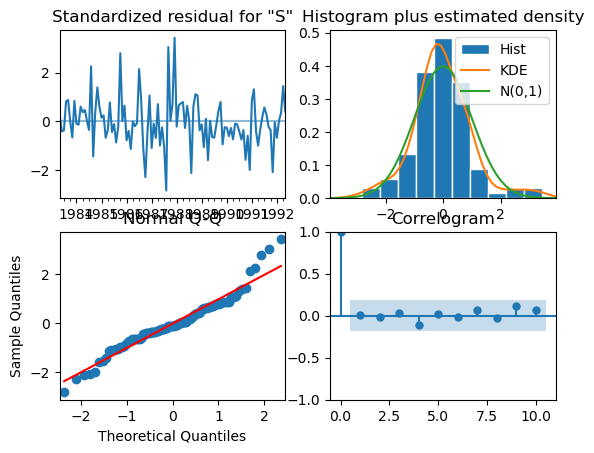

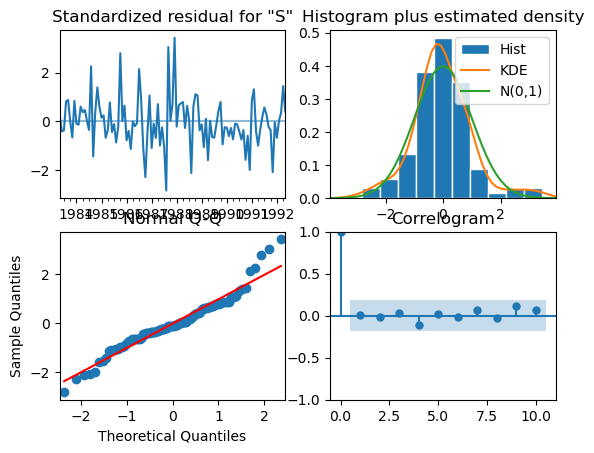

In [238]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

### Predict on the Test by using this model and evaluate the model.

In [239]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1992-06-01  1493.385637  405.007763     699.585007    2287.186267
1992-07-01  2098.294598  418.681085    1277.694751    2918.894445
1992-08-01  1823.881589  418.794115    1003.060208    2644.702971
1992-09-01  2449.942007  419.218384    1628.289074    3271.594941
1992-10-01  3328.962402  419.825650    2506.119249    4151.805556

In [240]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 294.6875592084972 
MAPE: 10.510251520427904


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [241]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,2)             1326.623799  40.736520
ARIMA(0,1,0)             1490.207448  25.510451
SARIMA(3,1,1)(3,0,2,12)   294.687559  10.510252

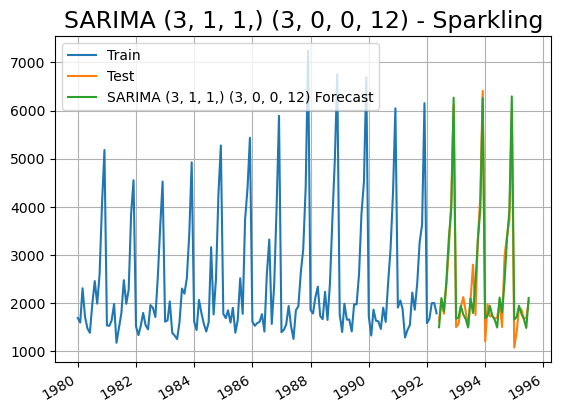

In [242]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

### SARIMA model for which the best parameters are selected at the ACF and the PACF plots. - Seasonality at 12 months - SPARKLING

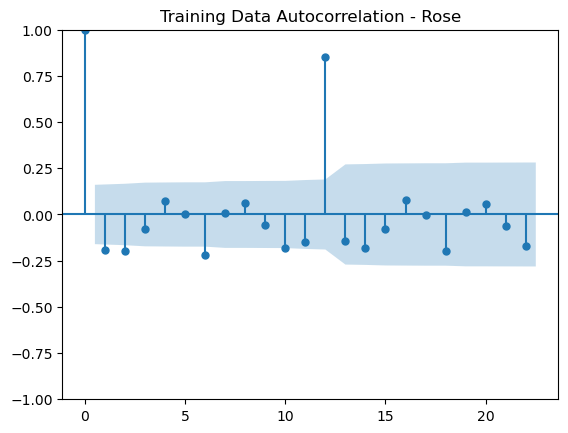

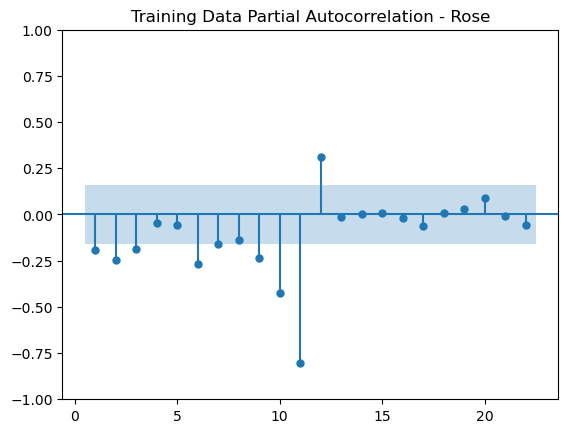

In [243]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [244]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  149
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -938.062
Date:                              Sun, 14 Apr 2024   AIC                           1882.123
Time:                                      14:21:34   BIC                           1890.560
Sample:                                  01-01-1980   HQIC                          1885.550
                                       - 05-01-1992                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1541      0.174      0.885      0.376      -0.187       0.495
ma.S.L12      -0.61

In [245]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  149
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -850.564
Date:                                 Sun, 14 Apr 2024   AIC                           1711.127
Time:                                         14:21:35   BIC                           1724.675
Sample:                                     01-01-1980   HQIC                          1716.623
                                          - 05-01-1992                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1219      1.452     -0.084      0.933      -2.968       2

In [246]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  149
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -767.963
Date:                                 Sun, 14 Apr 2024   AIC                           1547.926
Time:                                         14:21:36   BIC                           1563.557
Sample:                                     01-01-1980   HQIC                          1554.253
                                          - 05-01-1992                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3309      0.937     -0.353      0.724      -2.168       1

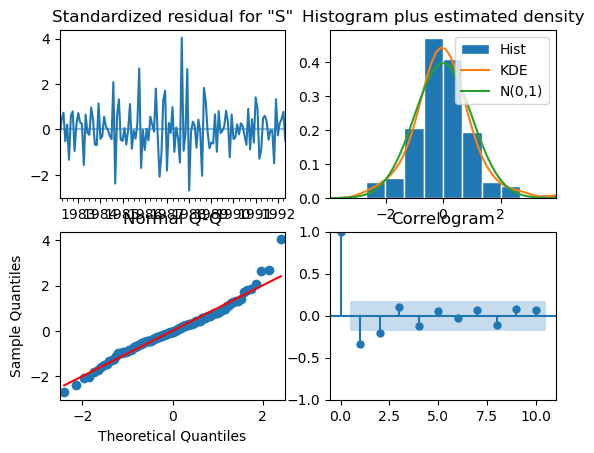

In [247]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

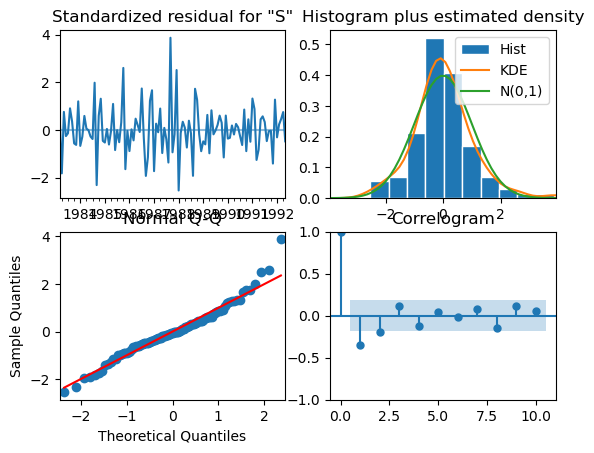

In [248]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

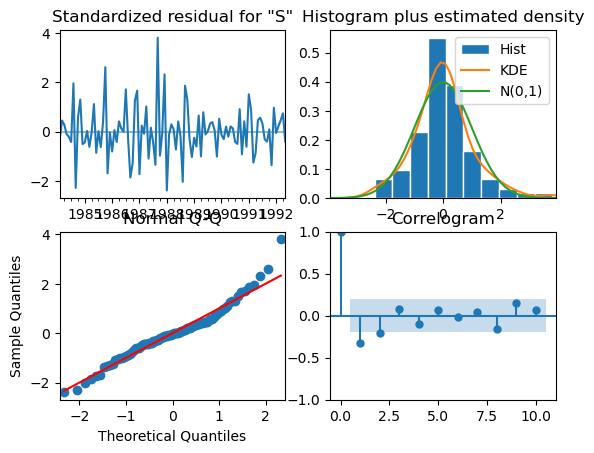

In [249]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

### Predict on the Test by using this model and evaluate the model.

In [250]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))


rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 526.1637123348268 
MAPE: 24.241683473179016


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [251]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 538.4523638412815 
MAPE: 24.935115778469214


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [252]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 565.5210290304777 
MAPE: 26.131921663377483


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [253]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,2)             1326.623799  40.736520
ARIMA(0,1,0)             1490.207448  25.510451
SARIMA(3,1,1)(3,0,2,12)   294.687559  10.510252
SARIMA(0,1,0)(3,1,2,12)   526.163712  24.241683
SARIMA(0,1,0)(2,1,2,12)   538.452364  24.935116
SARIMA(0,1,0)(3,1,2,12)   565.521029  26.131922

In [254]:
resultsR0 = resultsDf.copy()

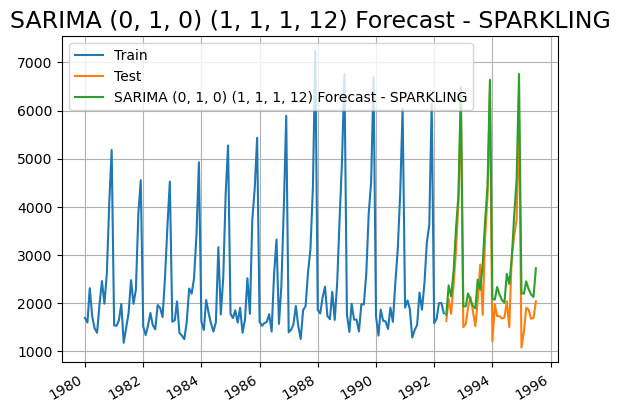

In [255]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

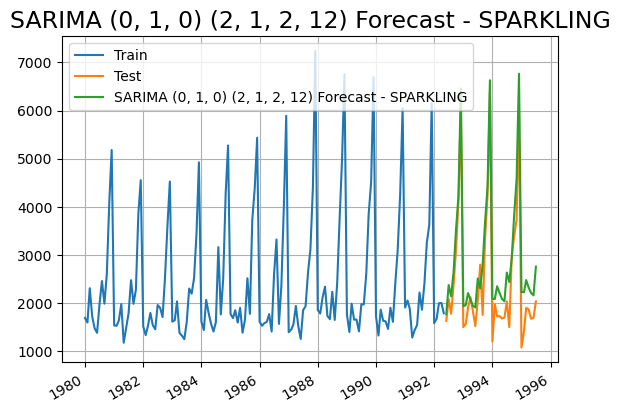

In [256]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

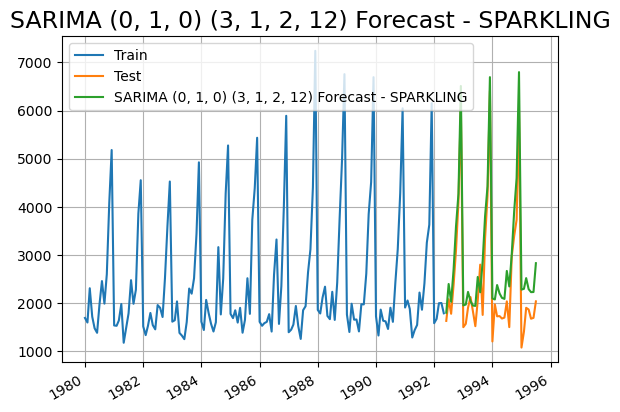

In [257]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

In [258]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_data['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -588.470
Date:                            Sun, 14 Apr 2024   AIC                           1194.940
Time:                                    14:21:41   BIC                           1221.854
Sample:                                01-01-1980   HQIC                          1205.875
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3834      1.966     -0.195      0.845      -4.236       3.469
ar.L2          0.0432      0.200   

### Evaluate the whole data and predict the next 12 months

In [259]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.569439  12.870898      18.342942      68.795937
1995-09-01  43.669957  13.066384      18.060315      69.279599
1995-10-01  45.502658  13.131745      19.764911      71.240405
1995-11-01  57.568925  13.187539      31.721823      83.416027
1995-12-01  84.974279  13.242781      59.018906     110.929653

In [260]:
rmse = mean_squared_error(rose_data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.08076259056516


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


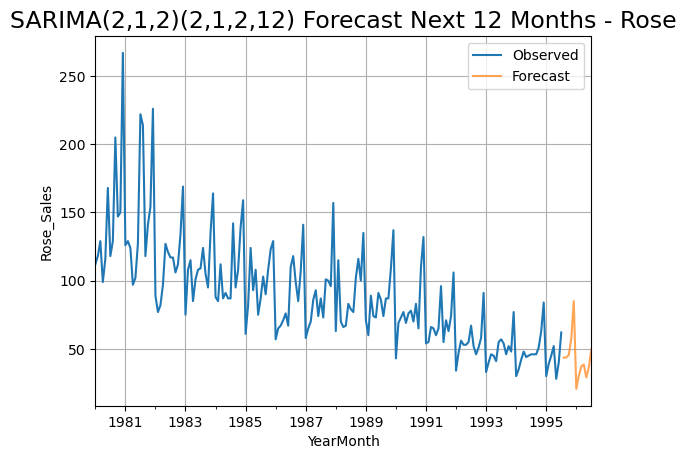

In [261]:
axis = rose_data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [262]:
resultsDf

RMSE       MAPE
ARIMA(2,1,2)             1326.623799  40.736520
ARIMA(0,1,0)             1490.207448  25.510451
SARIMA(3,1,1)(3,0,2,12)   294.687559  10.510252
SARIMA(0,1,0)(3,1,2,12)   526.163712  24.241683
SARIMA(0,1,0)(2,1,2,12)   538.452364  24.935116
SARIMA(0,1,0)(3,1,2,12)   565.521029  26.131922

In [263]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [264]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
SimpleAverageModel                                       52.184392   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.448930   
6pointTrailingMovingAverage                              14.560046   
9pointTrailingMovingAverage                              14.724503   
RegressionOnTime                                         17.475054   
Simple Exponential Smoothing                             20.263217   
Double Exponential Smoothing                             13.723188   
Triple Exponential Smoothing (Additive Season)           13.814672   
Triple Exponential Smoothing (Multiplicative Se...        8.392115   
Triple Exponential Smoothing (Additive Season, ...       19.869175   
Triple Exponential Smoothing (Multiplicative Se...       21.959062   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
SimpleAverageModel                                          2705.474937   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
RegressionOnTime                                            1349.042457   
Simple Exponential Smoothing                                1329.402416   
Double Exponential Smoothing                                1340.452773   
Triple Exponential Smoothing (Additive Season)               304.269498   
Triple Exponential Smoothing (Multiplicative Se...           318.448069   
Triple Exponential Smoothing (Additive Season, ...           304.269498   
Triple Exponential Smoothing (Multiplicative Se...           318.393160   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE       MAPE  
SimpleAverageModel                                          NaN        NaN  
2pointTrailingMovingAverage                                 NaN        NaN  
4pointTrailingMovingAverage                                 NaN        NaN  
6pointTrailingMovingAverage                                 NaN        NaN  
9pointTrailingMovingAverage                                 NaN        NaN  
RegressionOnTime                                            NaN        NaN  
Simple Exponential Smoothing                                NaN        NaN  
Double Exponential Smoothing                                NaN        NaN  
Triple Exponential Smoothing (Additive Season)              NaN        NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN        NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN        NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN        NaN  
ARIMA(2,1,2)                                        1326.623799  40.736520  
ARIMA(0,1,0)                                        1490.207448  25.510451  
SARIMA(3,1,1)(3,0,2,12)                              294.687559  10.510252  
SARIMA(0,1,0)(3,1,2,12)                              526.163712

In [265]:
results_all_spark.to_csv('results_all_spark.csv')

### Best Model Till Now + Forecasting of next 12 months

## SPARKLING
### Triple Exponential Smoothing (Additive Season)

In [266]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07598099751674124, 'smoothing_trend': 0.03257274357221863, 'smoothing_seasonal': 0.4450362933371945, 'damping_trend': nan, 'initial_level': 2356.513027095144, 'initial_trend': -0.2841091799644726, 'initial_seasons': array([-636.24881661, -722.99617594, -398.6414572 , -473.44844951,
       -808.44233273, -815.36768471, -384.24121167,   73.00094193,
       -237.46241616,  272.32482319, 1541.39826342, 2590.09573213]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [267]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

1992-06-01    1492.760622
1992-07-01    2081.648113
1992-08-01    1945.838259
1992-09-01    2432.018639
1992-10-01    3339.451860
1992-11-01    4208.708249
1992-12-01    6385.122739
1993-01-01    1743.548313
1993-02-01    1709.839755
1993-03-01    1956.632621
1993-04-01    1774.366921
1993-05-01    1593.967249
Freq: MS, dtype: float64

In [268]:
plt.rcParams["figure.figsize"] = [16,9]

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1992-06-01   803.930168  1492.760622  2181.591076
1992-07-01  1392.817659  2081.648113  2770.478567
1992-08-01  1257.007805  1945.838259  2634.668713
1992-09-01  1743.188185  2432.018639  3120.849093
1992-10-01  2650.621406  3339.451860  4028.282315

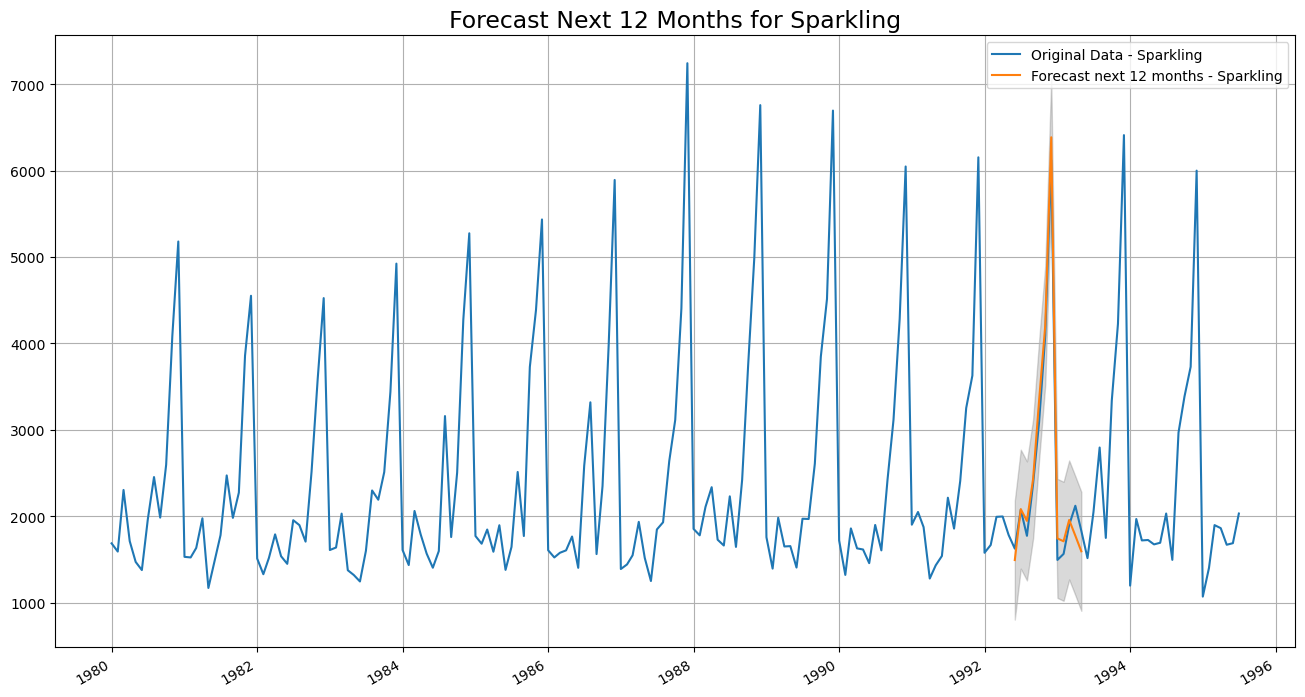

In [269]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(sparkling_data['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

### ROSE 

In [270]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10083960059112543, 'smoothing_trend': 4.2965688424589217e-08, 'smoothing_seasonal': 3.991179137092285e-06, 'damping_trend': nan, 'initial_level': 181.56754345863402, 'initial_trend': -0.7341831930831001, 'initial_seasons': array([0.59897864, 0.67782031, 0.74567332, 0.65876679, 0.73211723,
       0.78910661, 0.88071328, 0.91994756, 0.87035829, 0.85355009,
       0.9938724 , 1.36382035]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [271]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

1992-06-01    57.261352
1992-07-01    63.262227
1992-08-01    65.404902
1992-09-01    61.240479
1992-10-01    59.431138
1992-11-01    68.471884
1992-12-01    92.957663
1993-01-01    40.386411
1993-02-01    45.204826
1993-03-01    49.182585
1993-04-01    42.966883
1993-05-01    47.213414
Freq: MS, dtype: float64

In [272]:
plt.rcParams["figure.figsize"] = [16,9]

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1992-06-01  22.614846   57.261352   91.907859
1992-07-01  28.615720   63.262227   97.908733
1992-08-01  30.758395   65.404902  100.051408
1992-09-01  26.593972   61.240479   95.886985
1992-10-01  24.784631   59.431138   94.077644

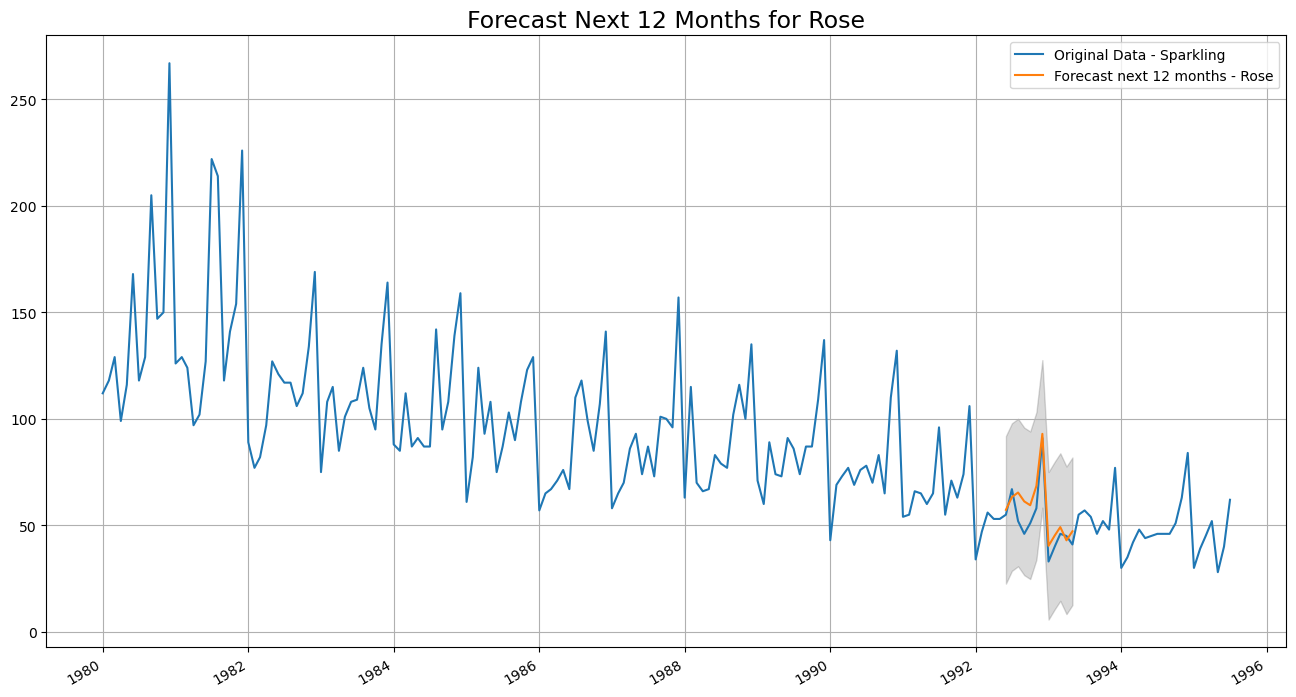

In [273]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rose_data['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');